# Human Action Detection

## 1. Importing the dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sna

In [6]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [67]:
from sklearn.metrics import classification_report, r2_score, accuracy_score, recall_score, precision_score, \
f1_score, confusion_matrix, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

## 2. Data Importing and analysis

In [27]:
import os
os.getcwd()

'C:\\Users\\gsaia\\AICTE\\Projects'

In [35]:
df = pd.read_csv("C:\Sem4\AICTE\Datasets\mhealth_raw_data.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\gsaia\AppData\Local\Temp\ipykernel_19244\1420522351.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("C:\Sem4\AICTE\Datasets\mhealth_raw_data.csv")


alx     aly      alz       glx      gly      glz     arx     ary  \
0        2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1        2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2        2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3        2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4        2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   
...         ...     ...      ...       ...      ...      ...     ...     ...   
1215740  1.7849 -9.8287  0.29725 -0.341370 -0.90056 -0.61493 -3.7198 -8.9071   
1215741  1.8687 -9.8766  0.46236 -0.341370 -0.90056 -0.61493 -3.7160 -8.7455   
1215742  1.6928 -9.9290  0.16631 -0.341370 -0.90056 -0.61493 -3.8824 -9.1155   
1215743  1.5279 -9.6306  0.30458 -0.341370 -0.90056 -0.61493 -3.5564 -9.1441   
1215744  1.6614 -9.8398  0.18088 -0.332100 -0.90432 -0.61886 -3.9035 -8.9324   

              arz       grx      gry       grz  Activity    subject  
0        0.187760 -0.449020 -1.01030  0.034483         0   subject1  
1        0.023595 -0.449020 -1.01030  0.034483         0   subject1  
2        0.275720 -0.449020 -1.01030  0.034483         0   subject1  
3        0.367520 -0.456860 -1.00820  0.025862         0   subject1  
4        0.407290 -0.456860 -1.00820  0.025862         0   subject1  
...           ...       ...      ...       ...       ...        ...  
1215740  0.294230  0.041176 -0.99384 -0.480600         0  subject10  
1215741  0.448140  0.041176 -0.99384 -0.480600         0  subject10  
1215742  0.450480  0.041176 -0.99384 -0.480600         0  subject10  
1215743  0.594880  0.041176 -0.99384 -0.480600         0  subject10  
1215744  0.761710  0.035294 -1.02050 -0.471980         0  subject10  

[1215745 rows x 14 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [37]:
df.describe().T

count      mean       std      min       25%       50%  \
alx       1215745.0  1.494200  3.826485 -22.1460   0.14131  1.308900   
aly       1215745.0 -9.692878  4.171303 -19.6190 -10.20100 -9.670300   
alz       1215745.0 -0.954806  5.461803 -19.3730  -2.64940 -0.016456   
glx       1215745.0 -0.001599  0.491217  -2.1466  -0.43599 -0.014842   
gly       1215745.0 -0.616632  0.354641  -7.7899  -0.81801 -0.707320   
glz       1215745.0 -0.158781  0.546798  -2.6267  -0.59332 -0.190570   
arx       1215745.0 -3.713413  4.763586 -22.3610  -6.07600 -2.977600   
ary       1215745.0 -5.805526  5.757639 -18.9720  -9.40420 -7.461500   
arz       1215745.0  2.393880  3.876503 -18.2390   0.12965  1.928100   
grx       1215745.0 -0.276106  0.527689  -8.3392  -0.70588 -0.354900   
gry       1215745.0 -0.466434  0.555551  -3.5708  -0.89733 -0.634500   
grz       1215745.0  0.266633  0.564380  -2.6897  -0.23707  0.301720   
Activity  1215745.0  1.741465  3.283679   0.0000   0.00000  0.000000   

               75%      max  
alx       2.575800  20.0540  
aly      -9.042200  21.1610  
alz       1.301300  25.0150  
glx       0.448980  60.4840  
gly      -0.540340   2.0113  
glz       0.322200   2.7701  
arx      -1.193700  19.8640  
ary      -2.533900  22.1910  
arz       4.914700  25.7410  
grx       0.096078   3.3196  
gry      -0.106780   1.5565  
grz       0.778020   2.7500  
Activity  2.000000  12.0000

In [38]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [40]:
df.duplicated().sum()

0

<Axes: xlabel='Activity'>

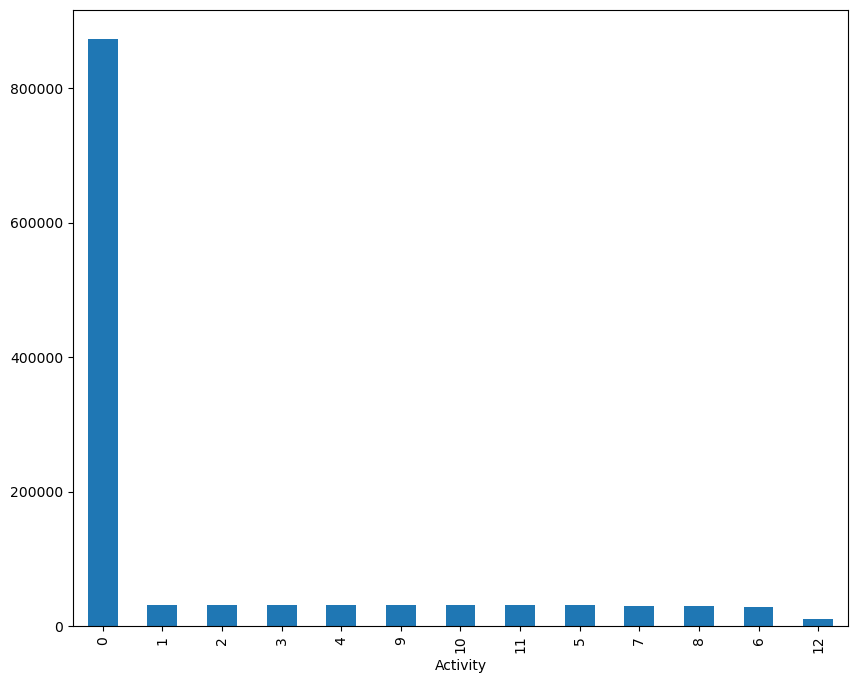

In [41]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [42]:
data_activity_0 = df[df["Activity"] == 0]
data_activity_else = df[df["Activity"] != 0]

In [45]:
data_activity_0 = data_activity_0.sample(n=40000)
df = pd.concat([data_activity_0, data_activity_else])

<Axes: xlabel='Activity'>

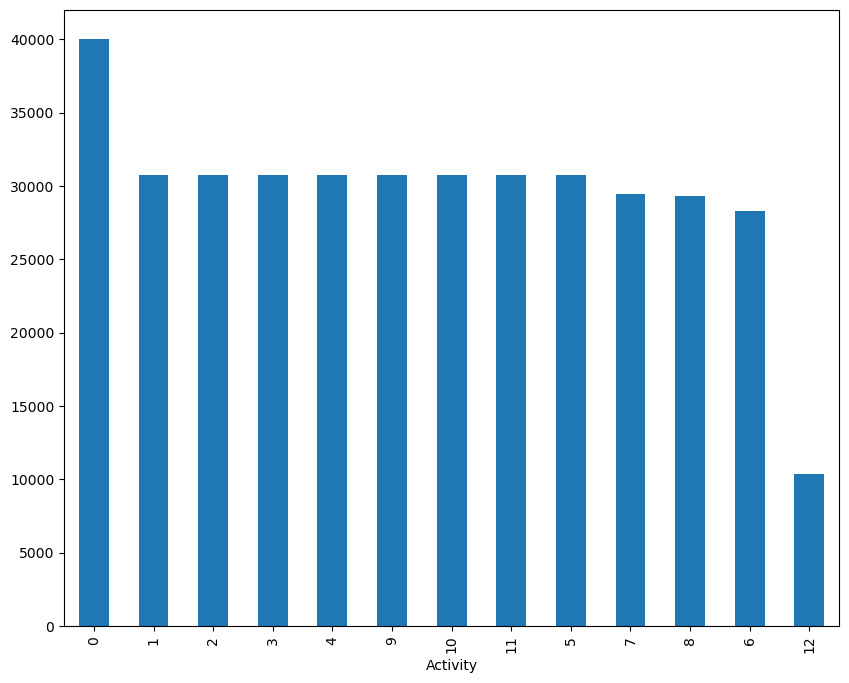

In [46]:
plt.figure(figsize = (10,8))
df['Activity'].value_counts().plot.bar()

In [47]:
len(df)

383195

## 3. EDA

In [48]:
activity_label = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)",
}

===============Standing still (1 min) - a===============.


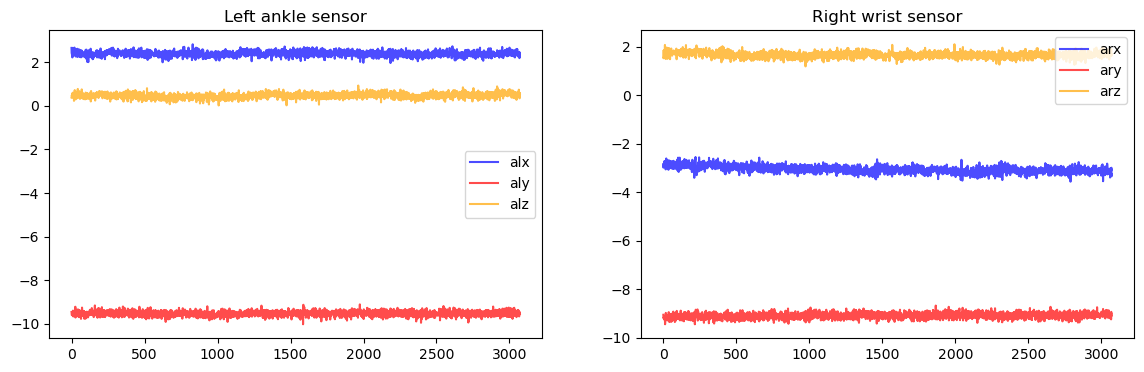

===============Standing still (1 min) - g===============.


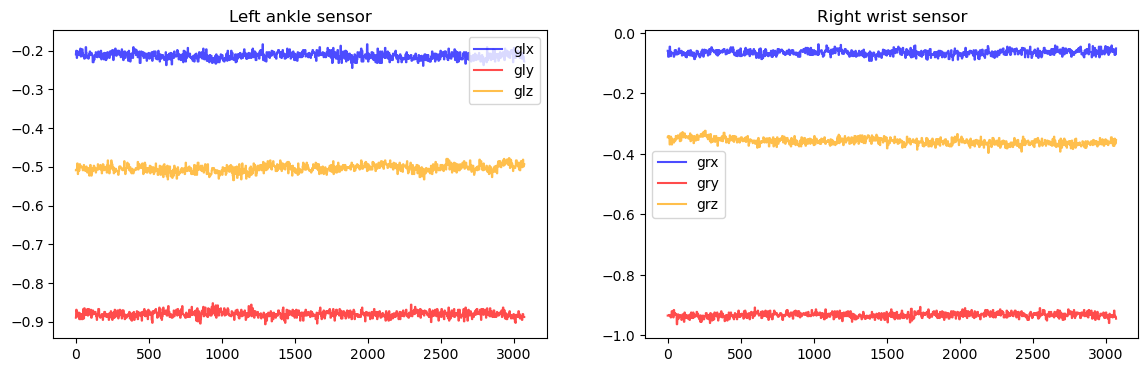

===============Sitting and relaxing (1 min) - a===============.


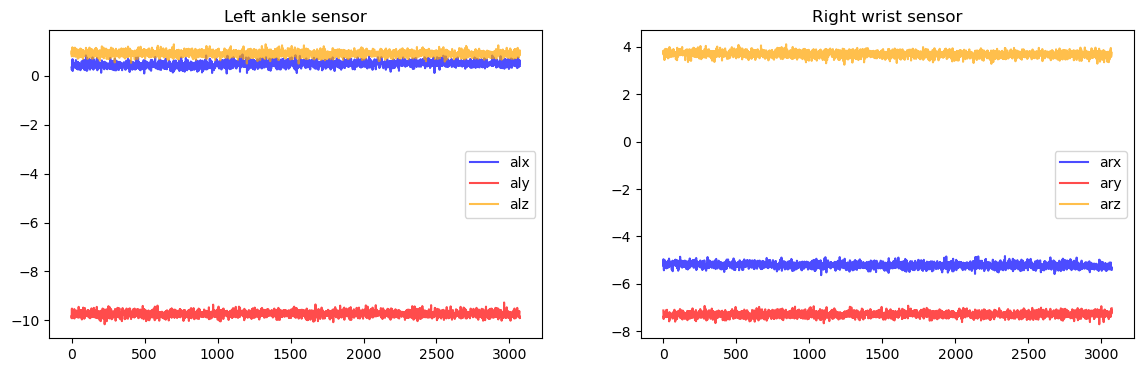

===============Sitting and relaxing (1 min) - g===============.


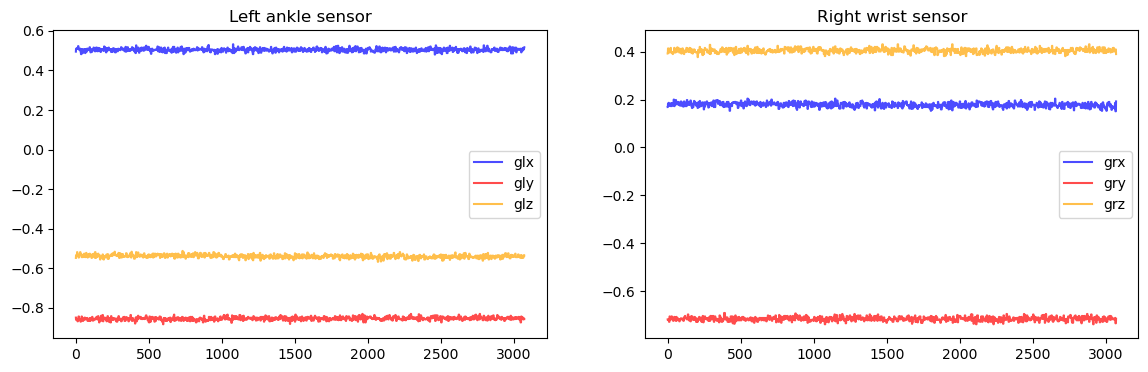

===============Lying down (1 min) - a===============.


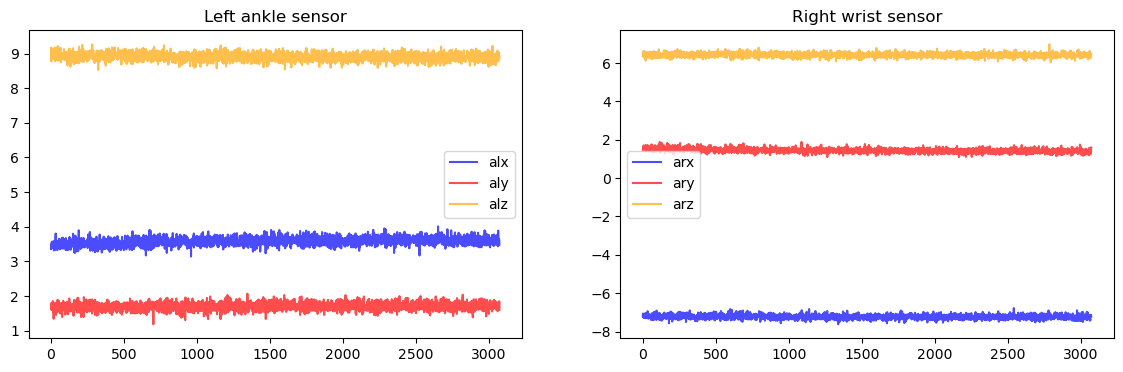

===============Lying down (1 min) - g===============.


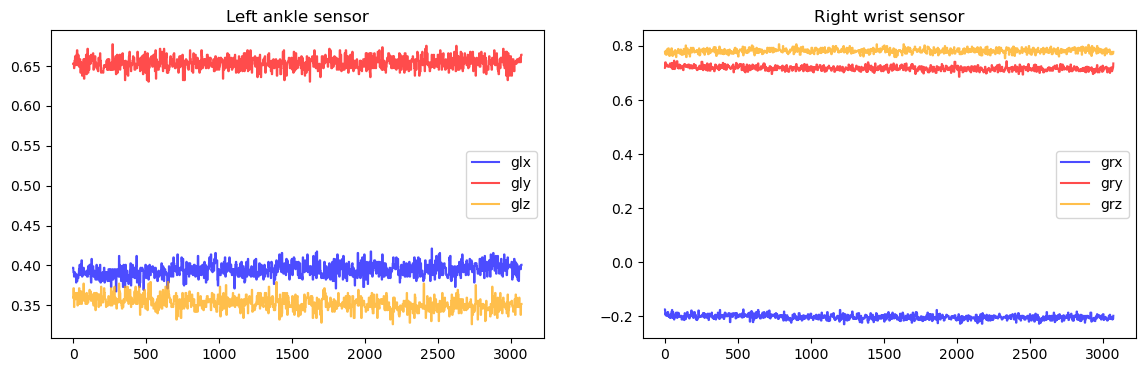

===============Walking (1 min) - a===============.


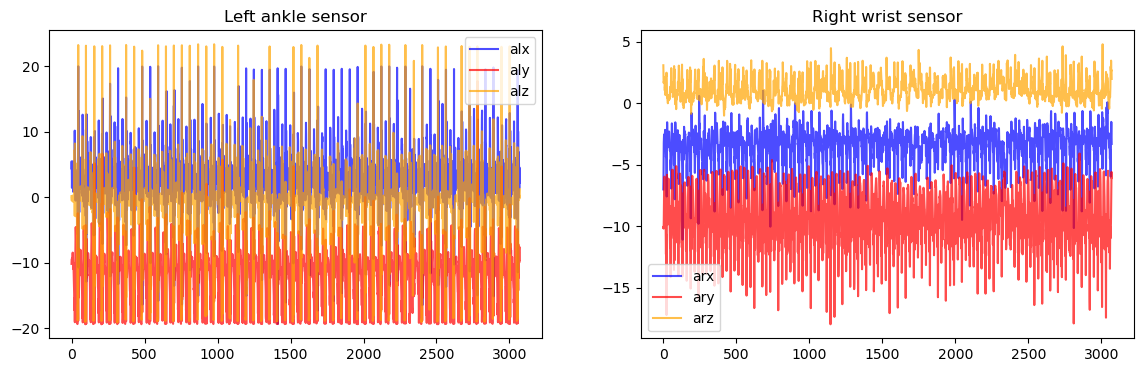

===============Walking (1 min) - g===============.


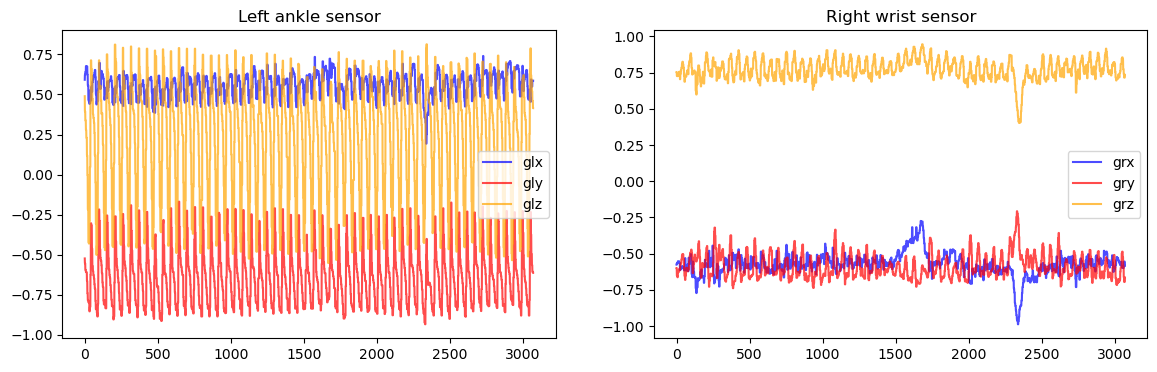

===============Climbing stairs (1 min) - a===============.


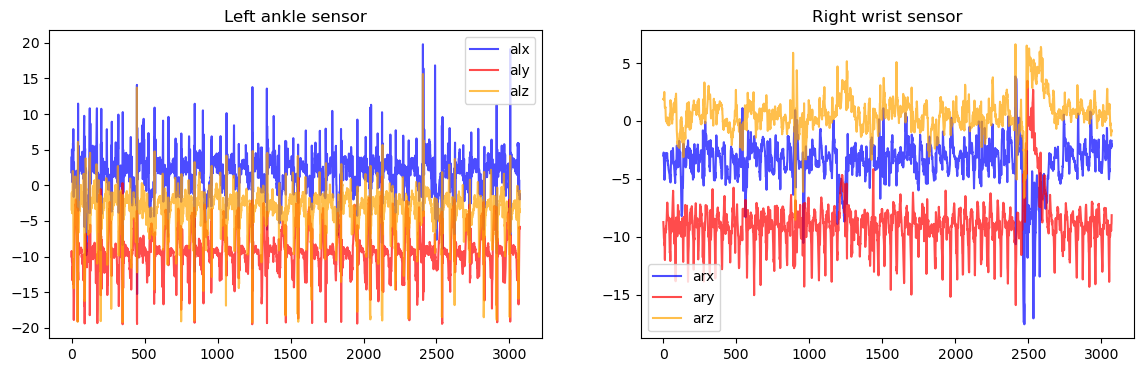

===============Climbing stairs (1 min) - g===============.


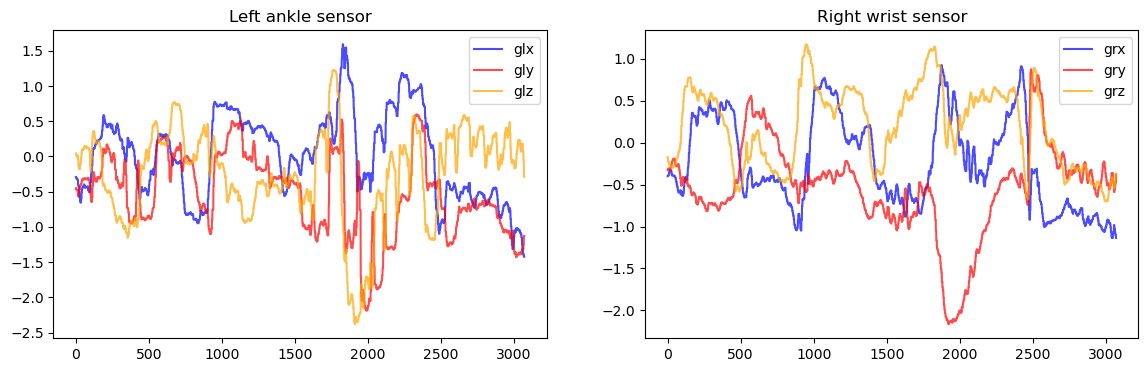

===============Waist bends forward (20x) - a===============.


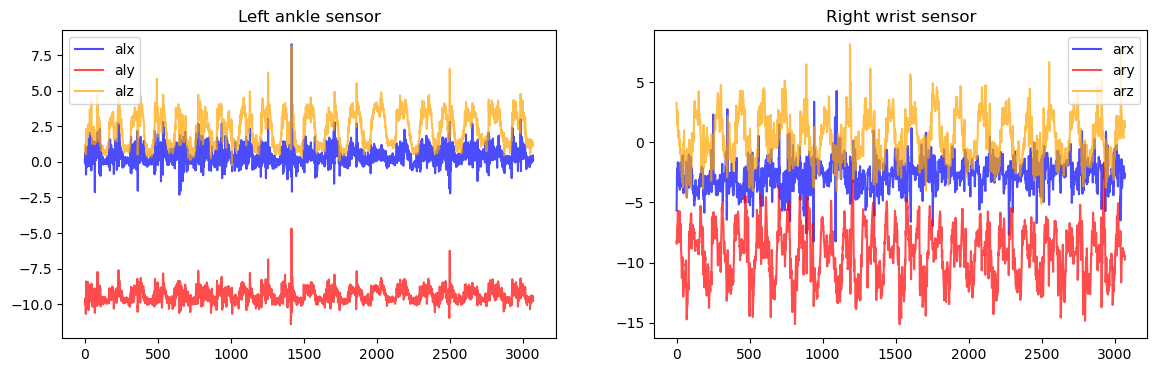

===============Waist bends forward (20x) - g===============.


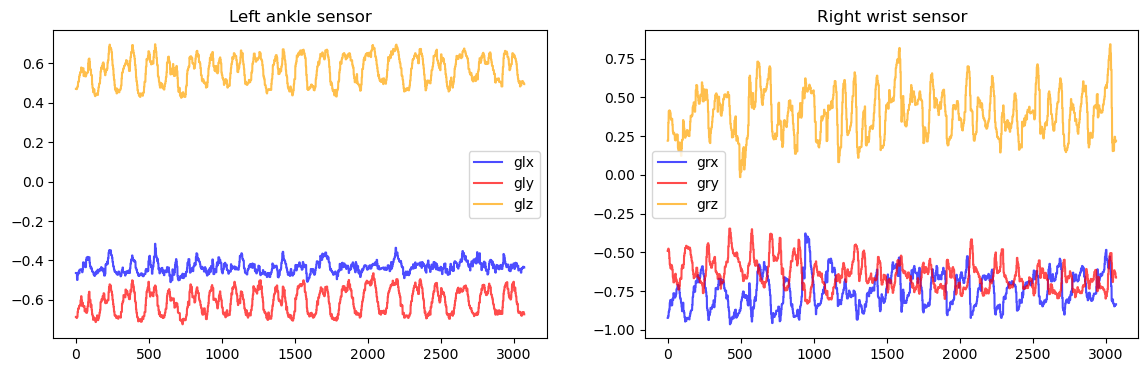

===============Frontal elevation of arms (20x) - a===============.


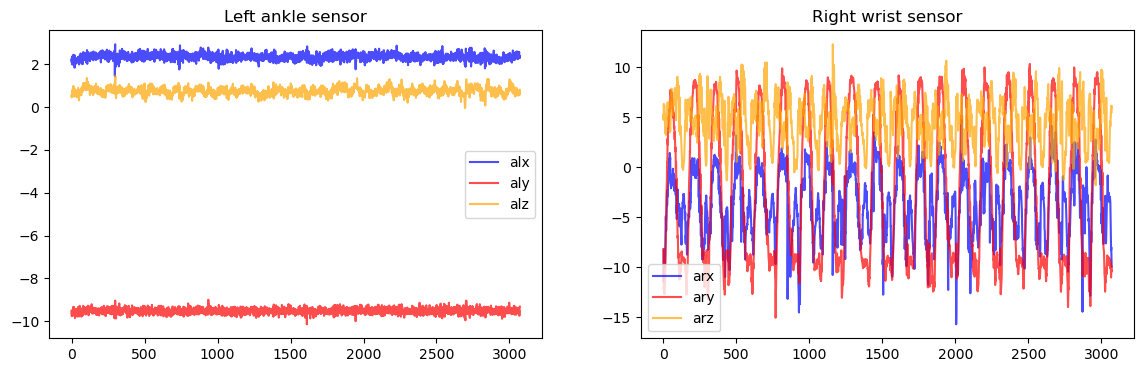

===============Frontal elevation of arms (20x) - g===============.


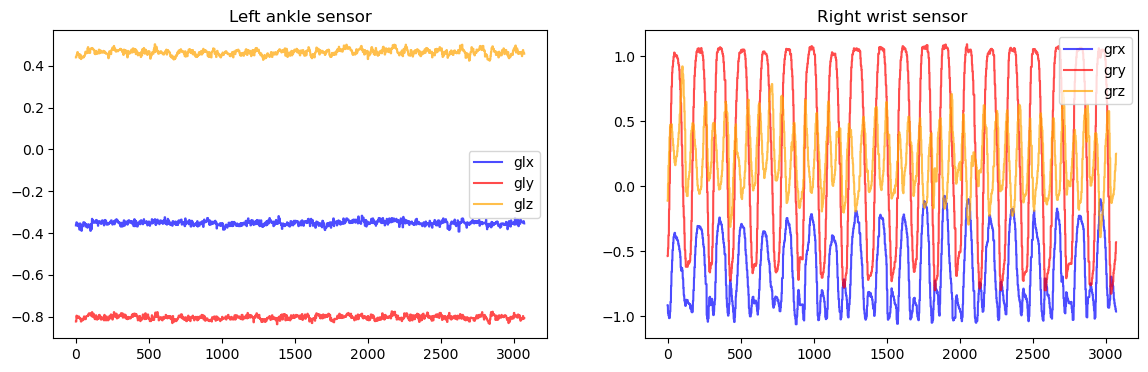

===============Knees bending (crouching) (20x) - a===============.


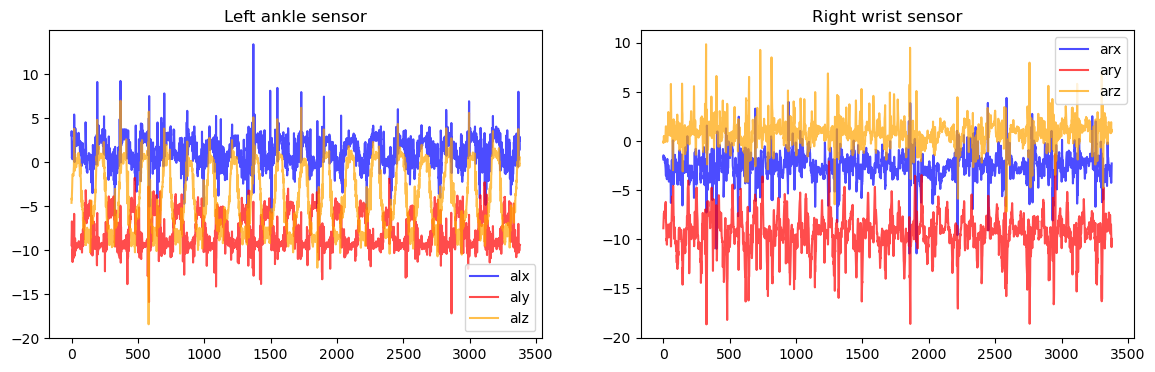

===============Knees bending (crouching) (20x) - g===============.


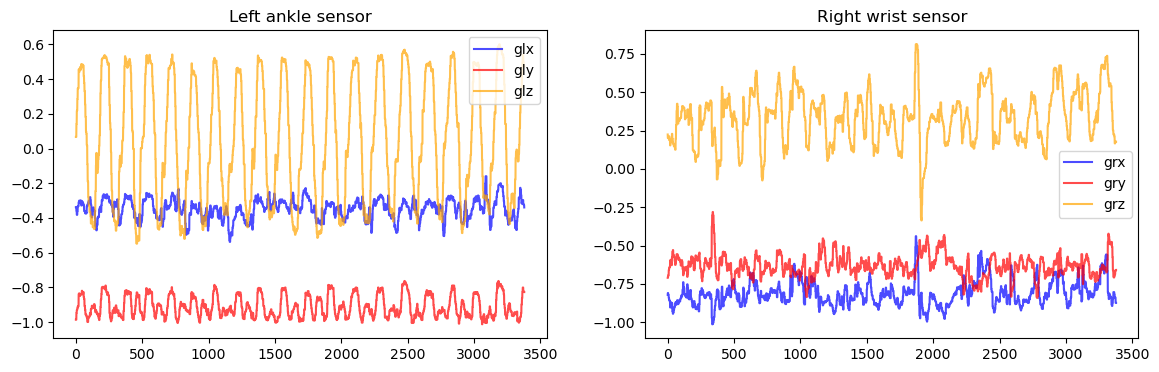

===============Cycling (1 min) - a===============.


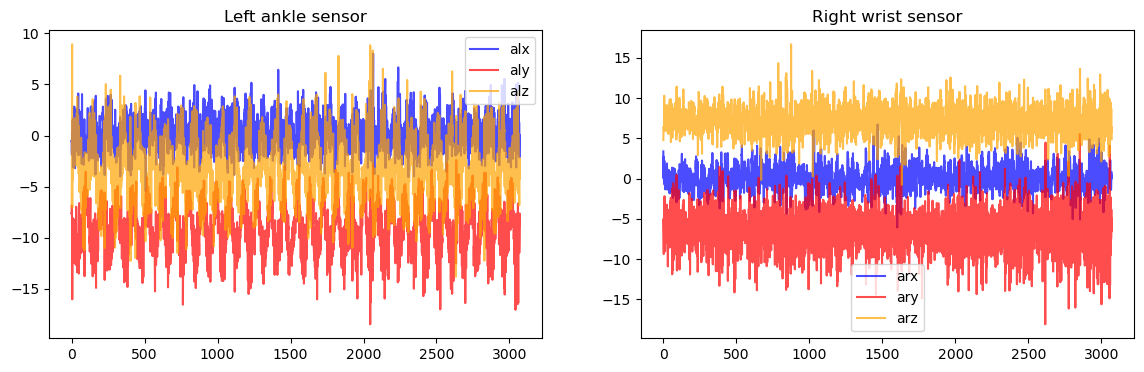

===============Cycling (1 min) - g===============.


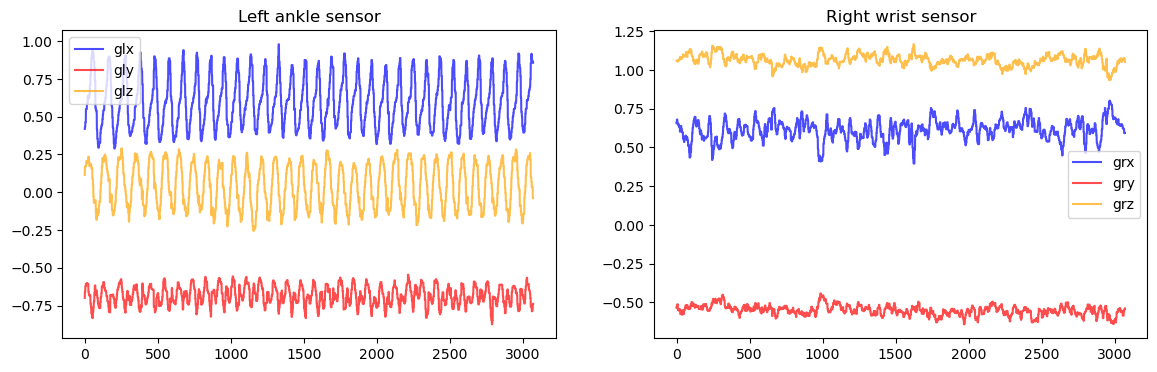

===============Jogging (1 min) - a===============.


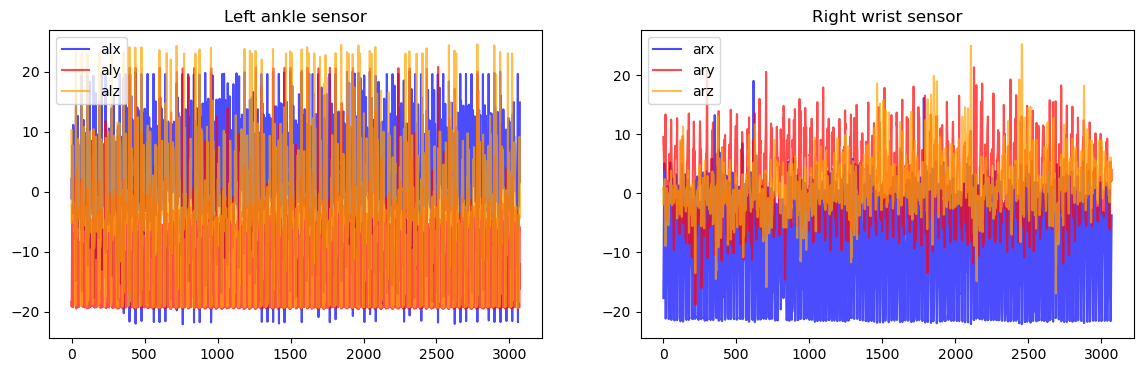

===============Jogging (1 min) - g===============.


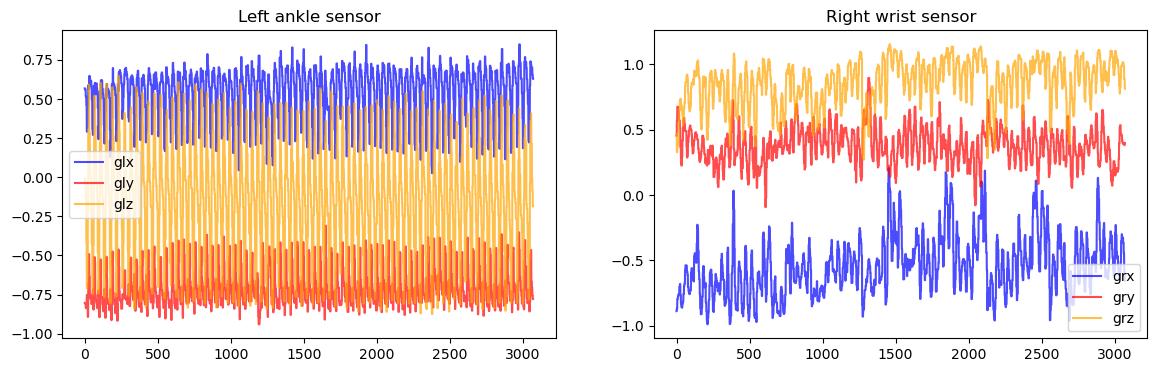

===============Running (1 min) - a===============.


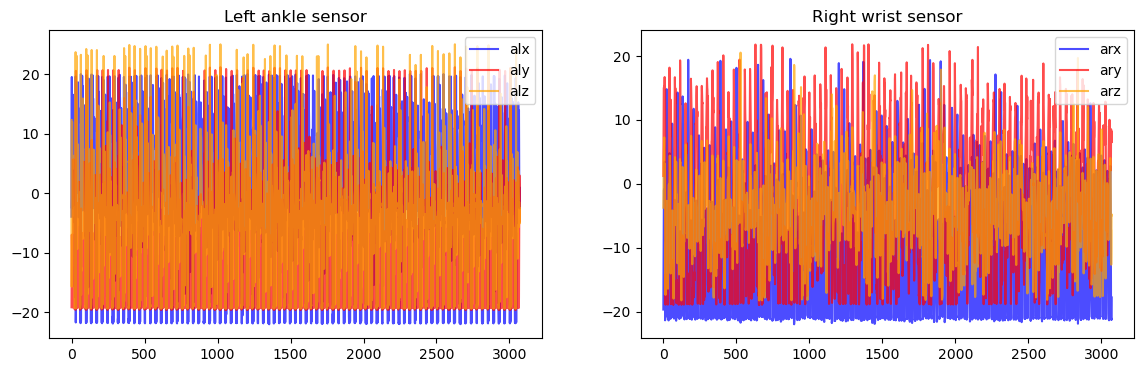

===============Running (1 min) - g===============.


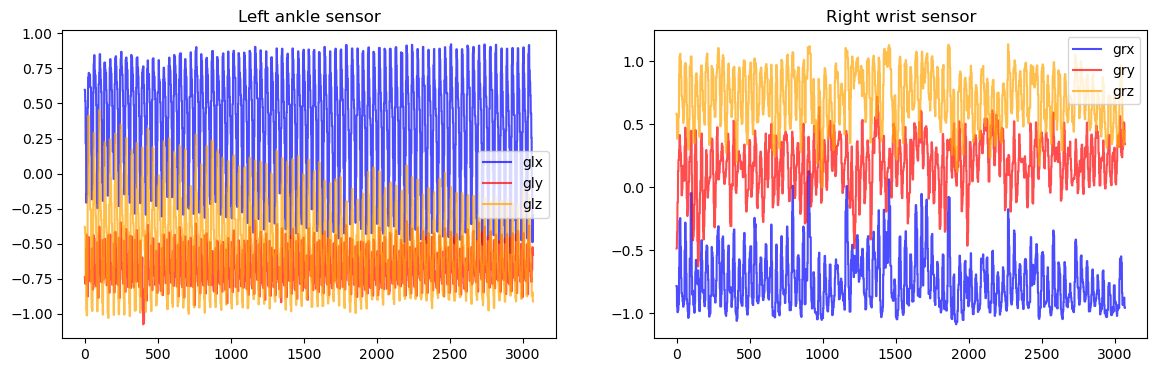

===============Jump front & back (20x) - a===============.


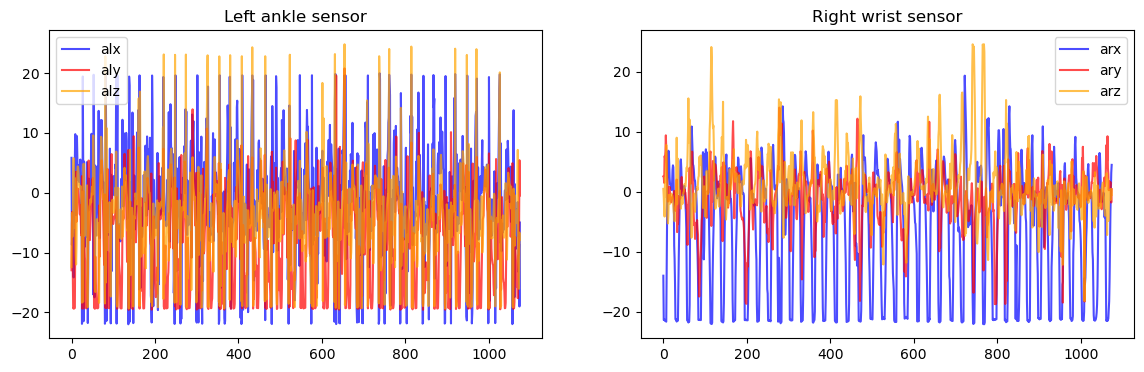

===============Jump front & back (20x) - g===============.


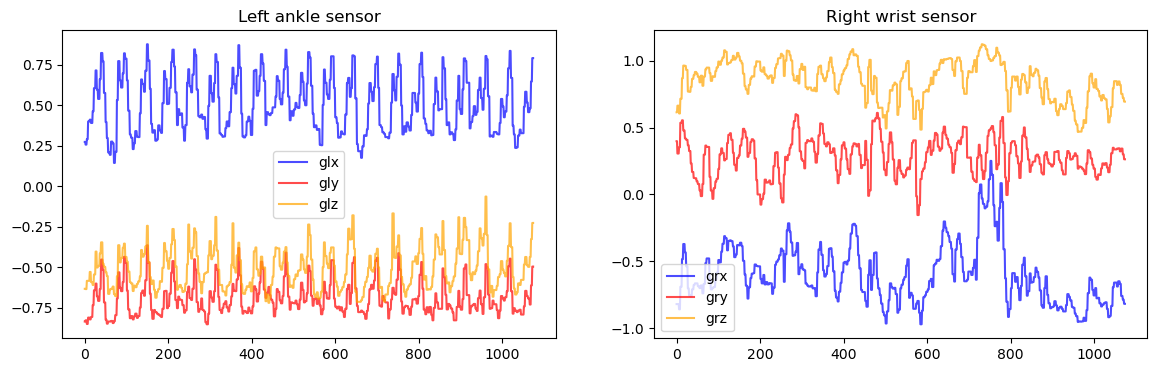

In [50]:
subject1 = df[df['subject'] == 'subject1']
readings = ['a', 'g']

for i in range(1,13):
    for r in readings:
        print(f"==============={activity_label[i]} - {r}===============.")
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"],
                color = 'blue', alpha = 0.7, label = r + "lx")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"],
                color = 'red', alpha = 0.7, label = r + "ly")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"],
                color = 'orange', alpha = 0.7, label = r + "lz")
        plt.title("Left ankle sensor")
        plt.legend()

        plt.subplot(1,2,2)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rx"],
                color = 'blue', alpha = 0.7, label = r + "rx")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ry"],
                color = 'red', alpha = 0.7, label = r + "ry")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rz"],
                color = 'orange', alpha = 0.7, label = r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()

===============Standing still (1 min) - a===============.


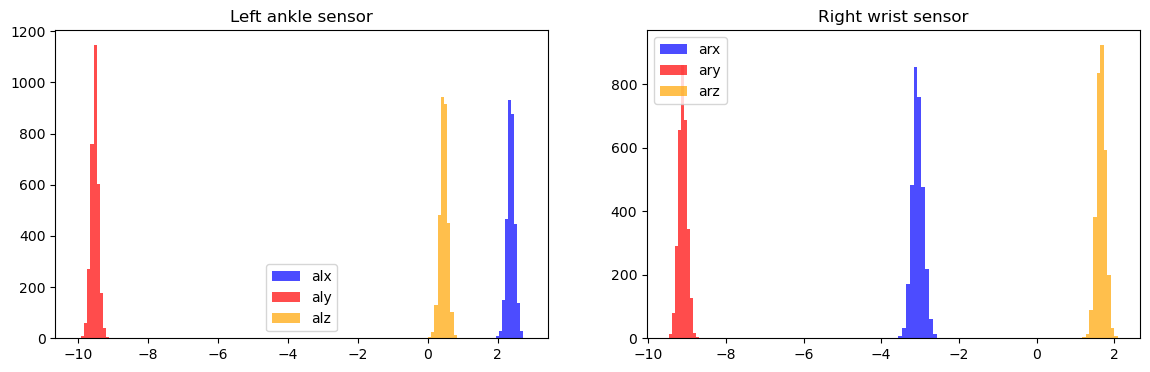

===============Standing still (1 min) - g===============.


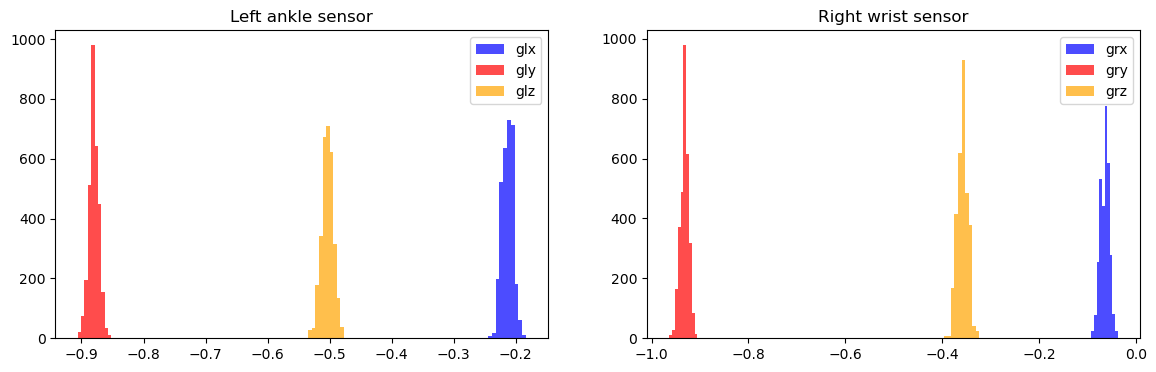

===============Sitting and relaxing (1 min) - a===============.


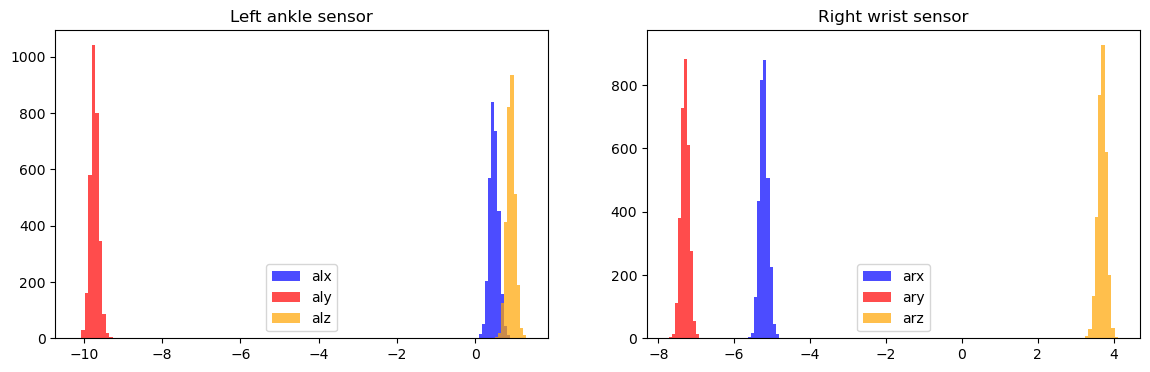

===============Sitting and relaxing (1 min) - g===============.


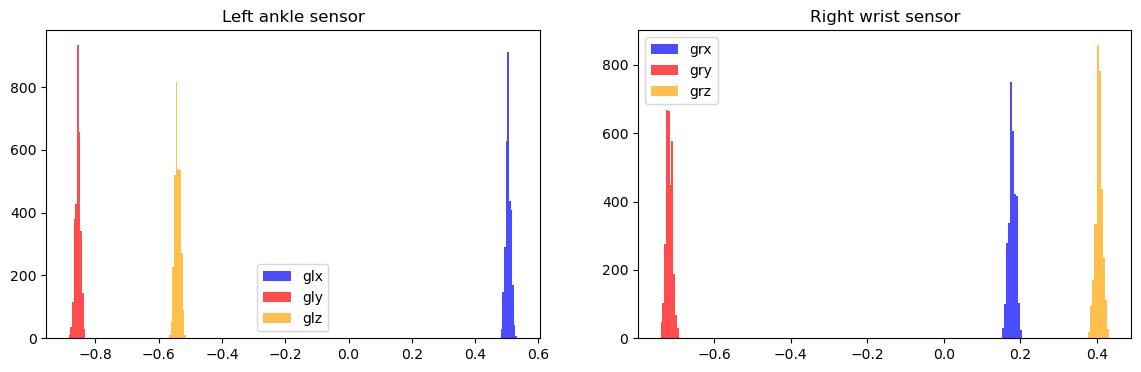

===============Lying down (1 min) - a===============.


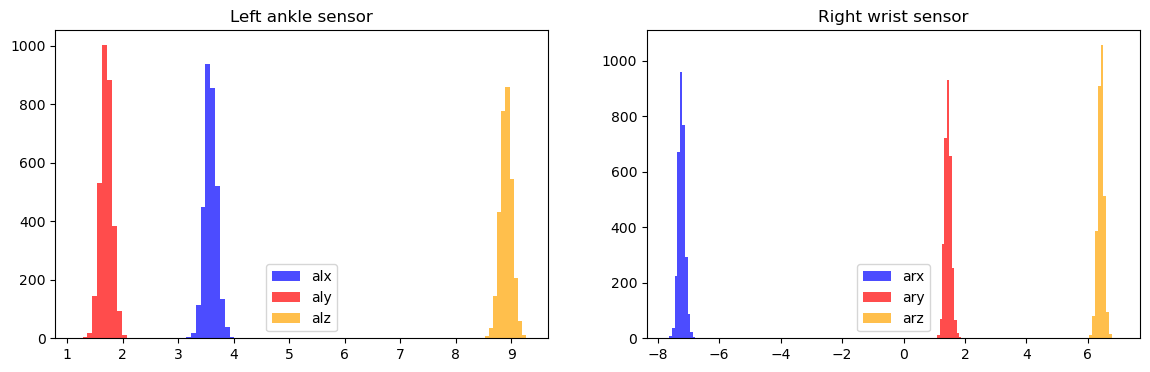

===============Lying down (1 min) - g===============.


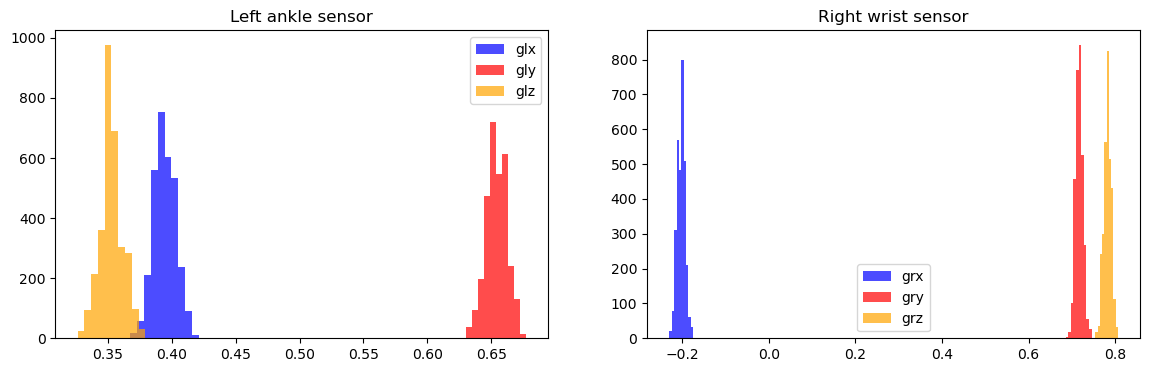

===============Walking (1 min) - a===============.


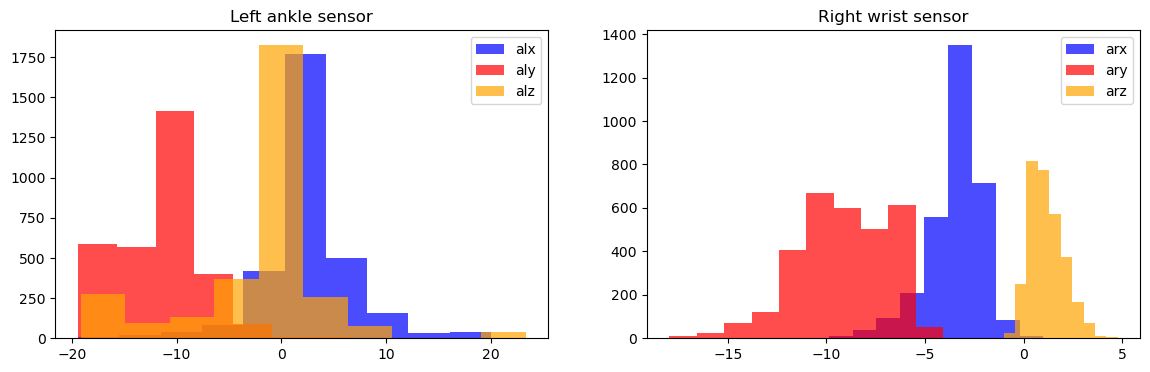

===============Walking (1 min) - g===============.


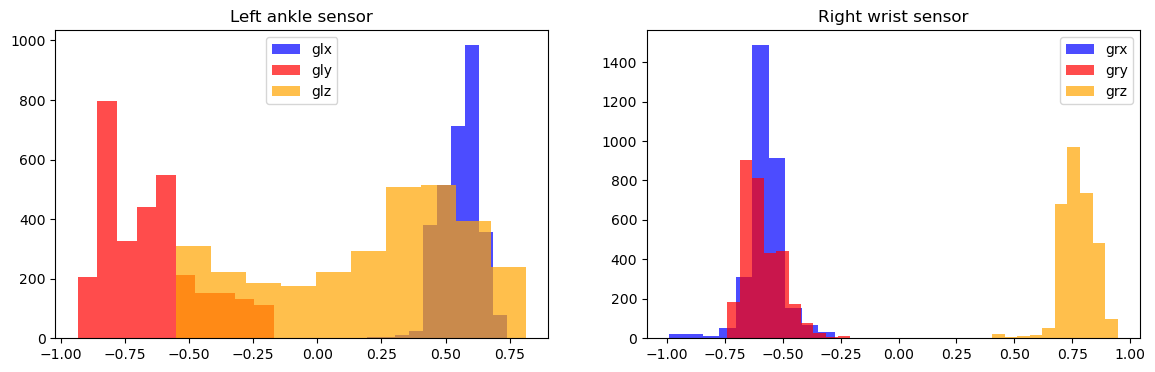

===============Climbing stairs (1 min) - a===============.


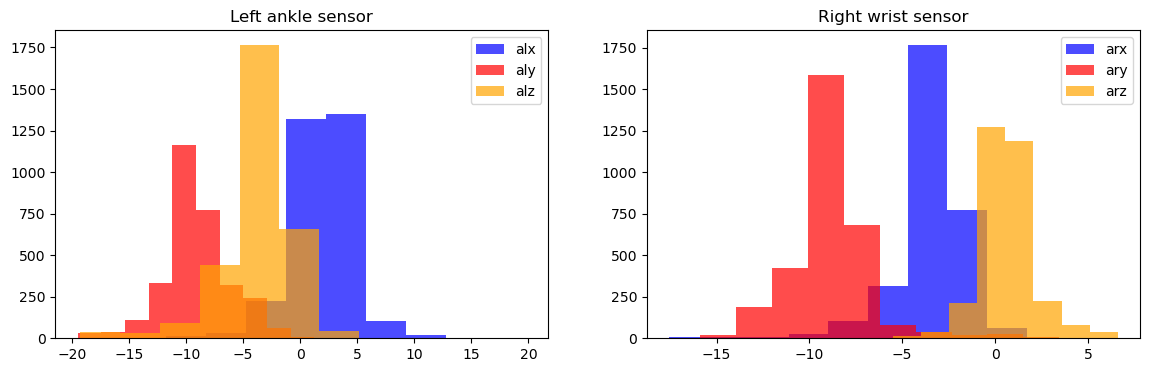

===============Climbing stairs (1 min) - g===============.


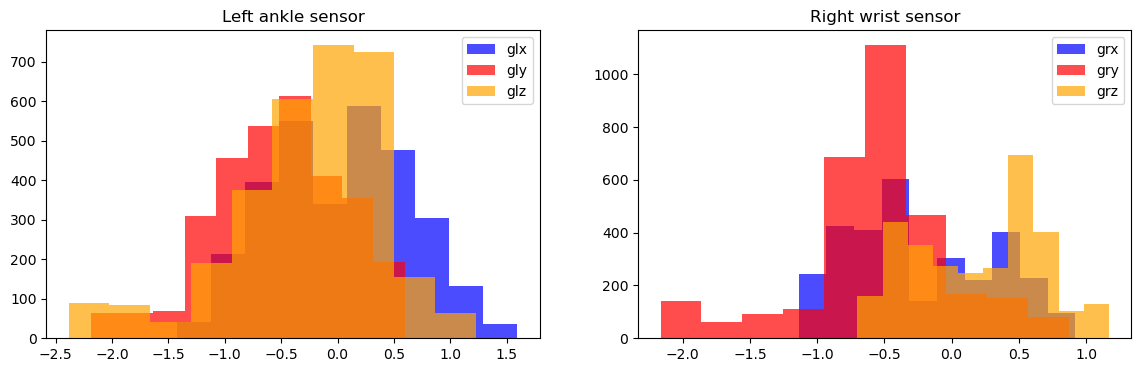

===============Waist bends forward (20x) - a===============.


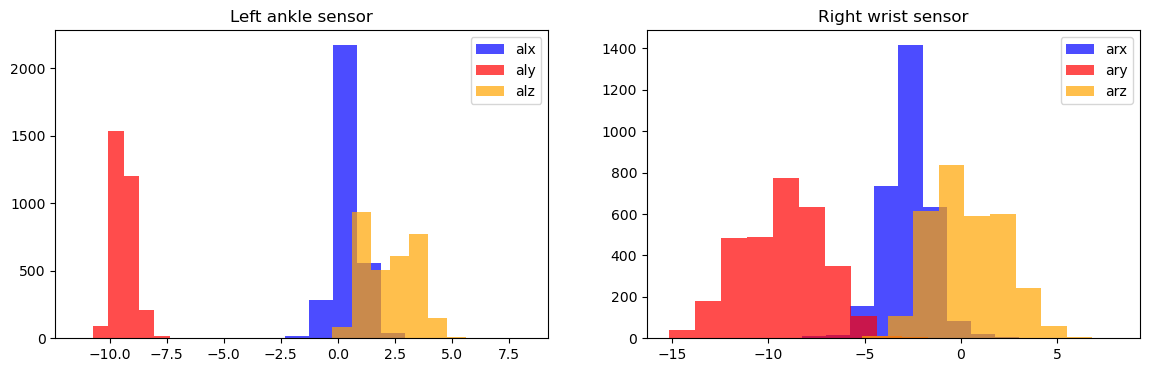

===============Waist bends forward (20x) - g===============.


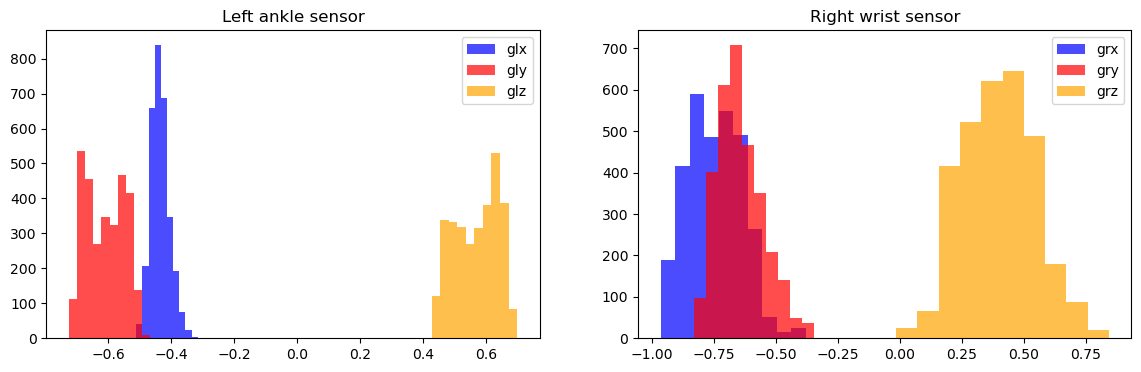

===============Frontal elevation of arms (20x) - a===============.


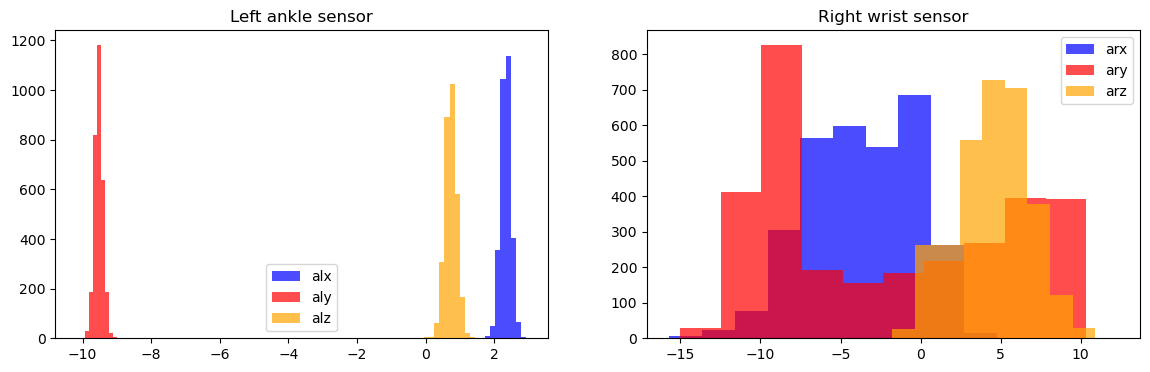

===============Frontal elevation of arms (20x) - g===============.


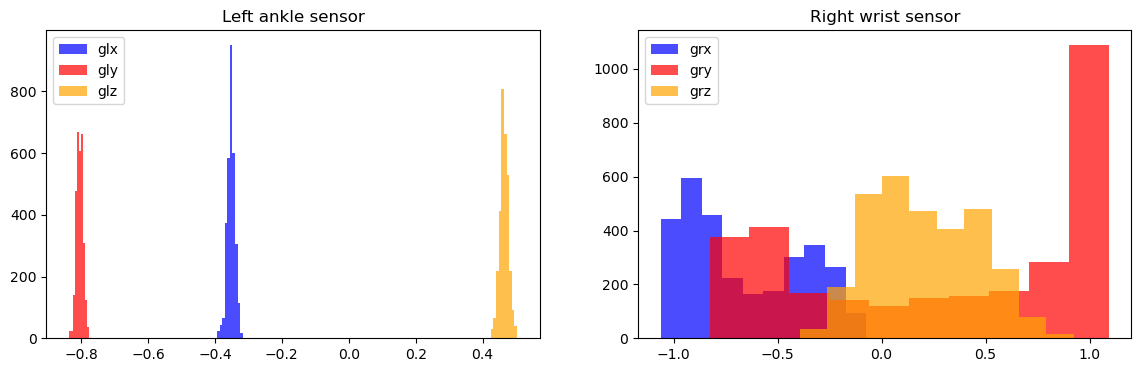

===============Knees bending (crouching) (20x) - a===============.


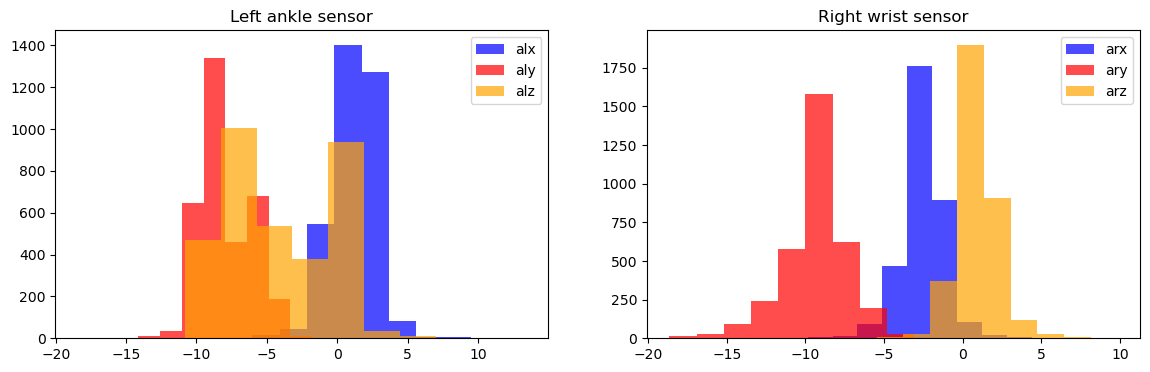

===============Knees bending (crouching) (20x) - g===============.


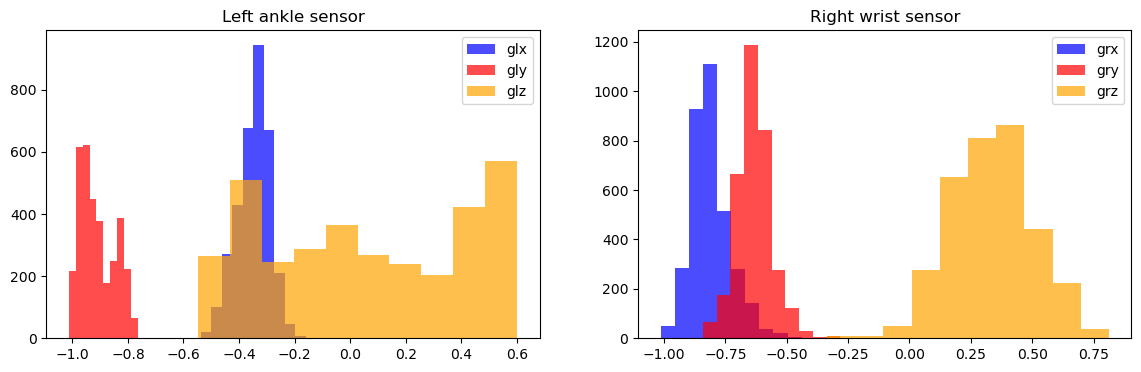

===============Cycling (1 min) - a===============.


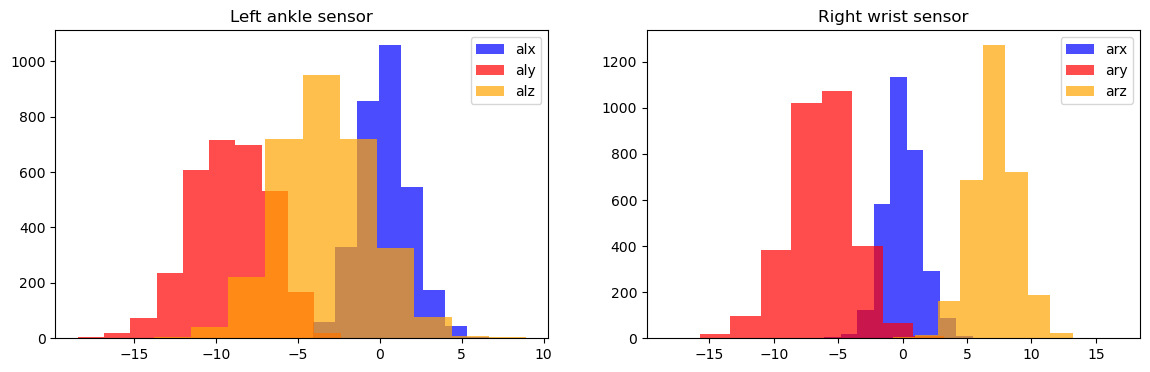

===============Cycling (1 min) - g===============.


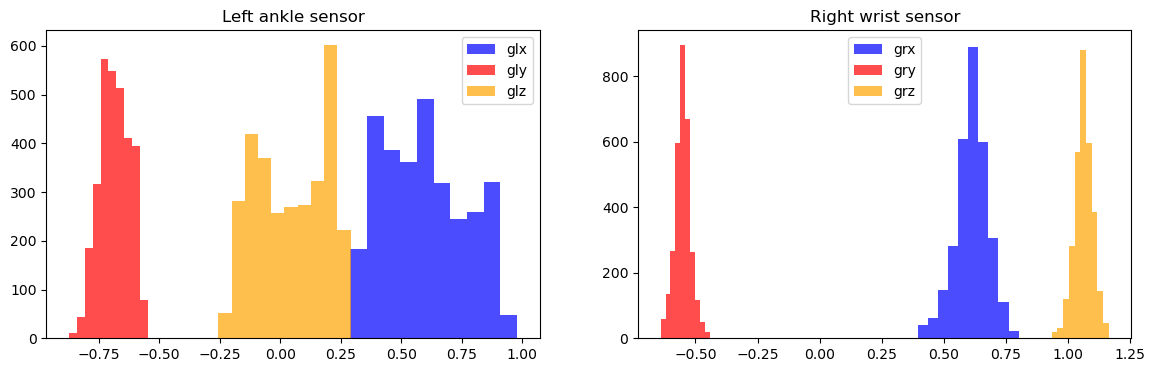

===============Jogging (1 min) - a===============.


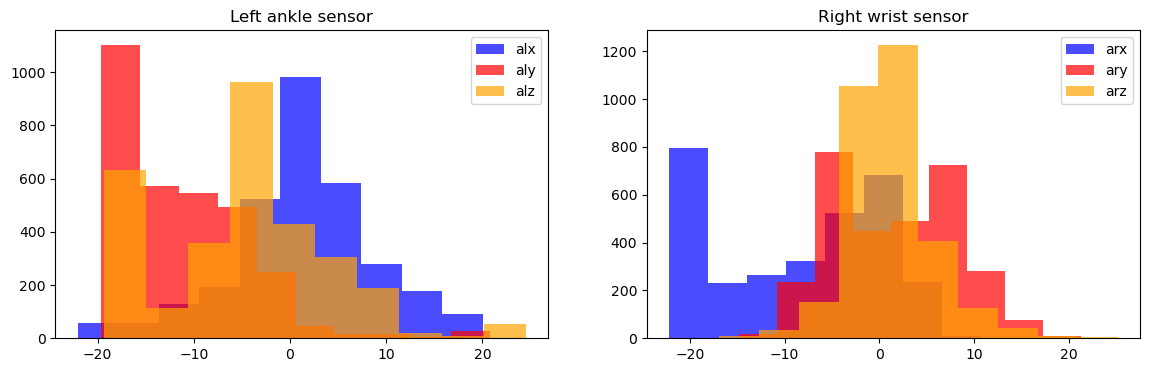

===============Jogging (1 min) - g===============.


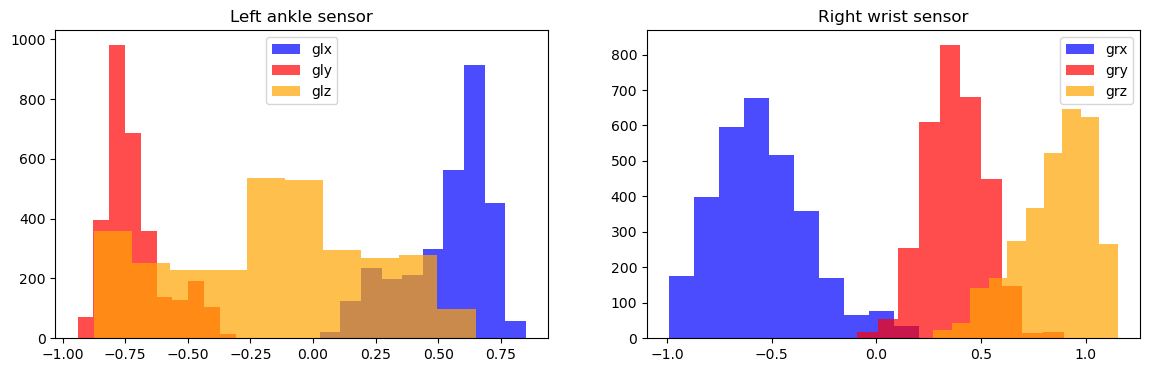

===============Running (1 min) - a===============.


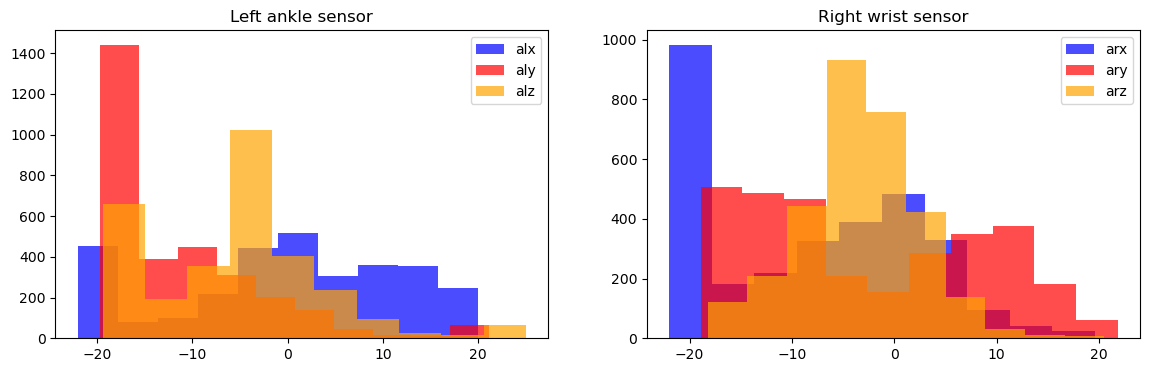

===============Running (1 min) - g===============.


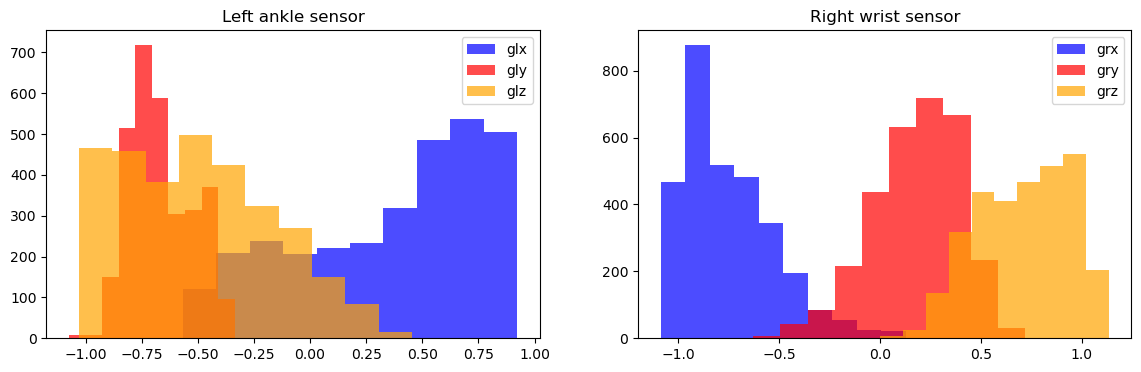

===============Jump front & back (20x) - a===============.


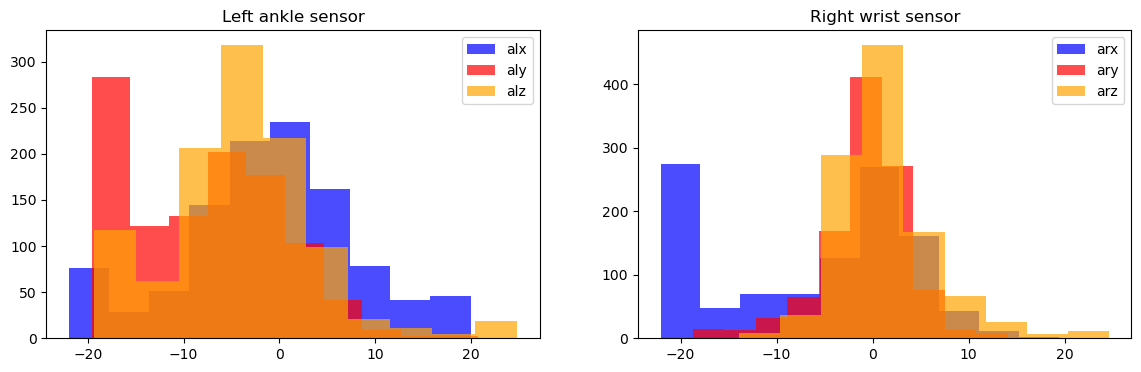

===============Jump front & back (20x) - g===============.


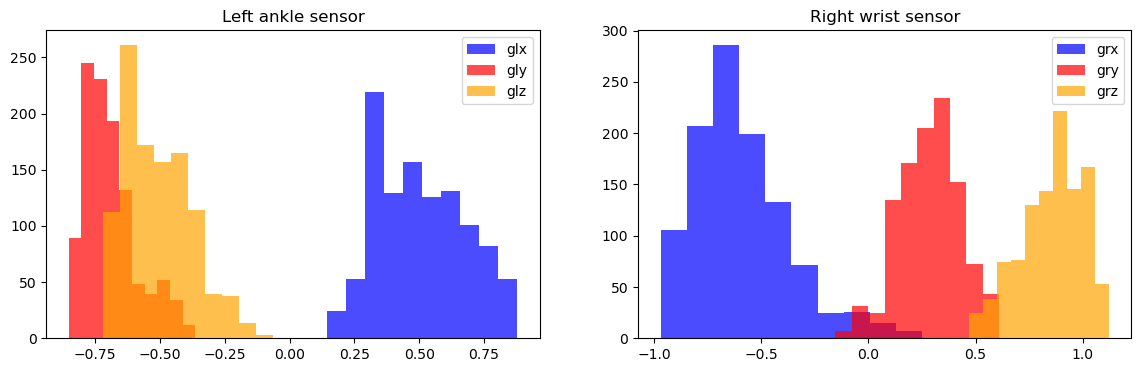

In [51]:
for i in range(1,13):
    for r in readings:
        print(f"==============={activity_label[i]} - {r}===============.")
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"],
                color = 'blue', alpha = 0.7, label = r + "lx")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"],
                color = 'red', alpha = 0.7, label = r + "ly")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"],
                color = 'orange', alpha = 0.7, label = r + "lz")
        plt.title("Left ankle sensor")
        plt.legend()

        plt.subplot(1,2,2)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rx"],
                color = 'blue', alpha = 0.7, label = r + "rx")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ry"],
                color = 'red', alpha = 0.7, label = r + "ry")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rz"],
                color = 'orange', alpha = 0.7, label = r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()

In [52]:
df['Activity'] = df['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],['None',
                                                                       'Standing still (1 min)',
                                                                       'Sitting and relaxing (1 min)',
                                                                       'Lying down (1 min)',
                                                                       'Walking (1 min)',
                                                                       'Climbing stairs (1 min)',
                                                                       'Waist bends forward (20x)',
                                                                       'Frontal elevation of arms (20x)',
                                                                       'Knees bending (crouching) (20x)',
                                                                       'Cycling (1 min)',
                                                                       'Jogging (1 min)',
                                                                       'Running (1 min)',
                                                                       'Jump front & back (20x)'])

In [53]:
df['Activity']

171517                        None
722021                        None
567761                        None
444748                        None
305911                        None
                    ...           
1213641    Jump front & back (20x)
1213642    Jump front & back (20x)
1213643    Jump front & back (20x)
1213644    Jump front & back (20x)
1213645    Jump front & back (20x)
Name: Activity, Length: 383195, dtype: object

In [54]:
df['Activity'].value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Jogging (1 min)                    30720
Running (1 min)                    30720
Climbing stairs (1 min)            30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: count, dtype: int64

<Axes: ylabel='count'>

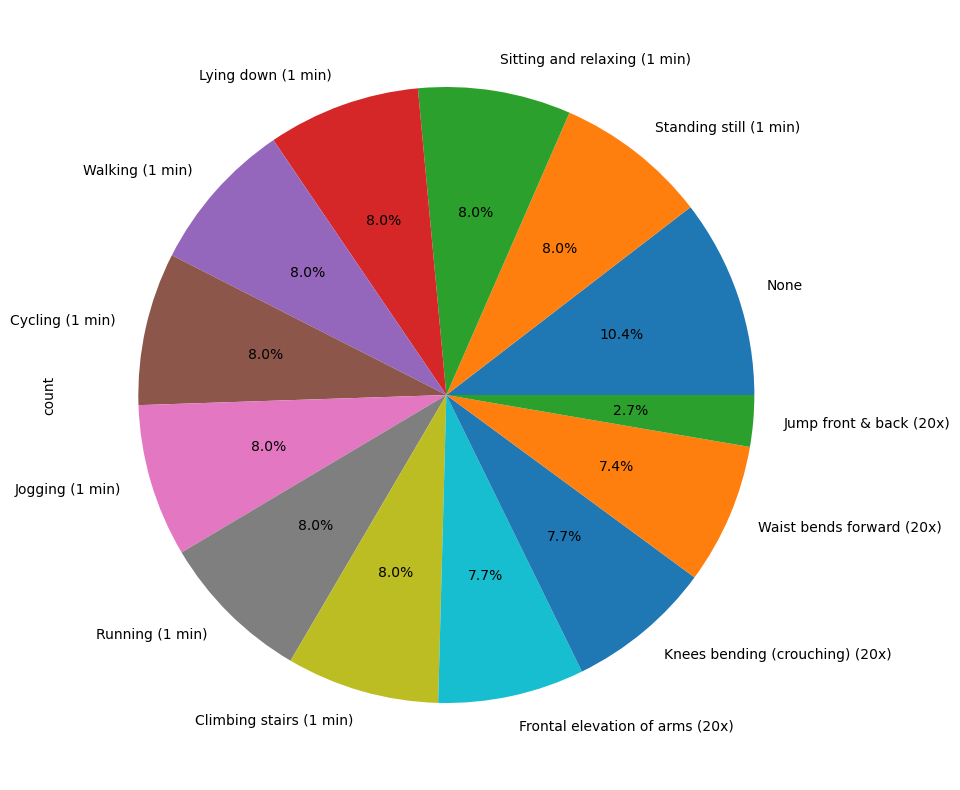

In [55]:
plt.figure(figsize=(12,10))
round(df['Activity'].value_counts()/df.shape[0]*100, 2).plot.pie(autopct = '%2.1f%%')

In [56]:
df1 = df.copy()

for feature in df1.columns[:-2]:
    lower_range = np.quantile(df[feature], 0.01)
    upper_range = np.quantile(df[feature], 0.99)
    print(feature, "range: ", lower_range, " to", upper_range)

    df1 = df1.drop(df1[(df1[feature] > upper_range) | (df1[feature] < lower_range)].index, axis=0)
    print('shape: ', df1.shape)

alx range:  -11.45112  to 19.233
shape:  (375551, 14)
aly range:  -19.378  to 2.387806
shape:  (369629, 14)
alz range:  -18.949  to 14.181
shape:  (365815, 14)
glx range:  -0.74954  to 0.80891
shape:  (358801, 14)
gly range:  -1.0638  to 0.96623
shape:  (352127, 14)
glz range:  -1.1061  to 0.8290799999999999
shape:  (346452, 14)
arx range:  -21.486  to 9.015735999999999
shape:  (341229, 14)
ary range:  -18.691  to 11.832
shape:  (334998, 14)
arz range:  -10.26506  to 11.770059999999997
shape:  (332320, 14)
grx range:  -1.0216  to 0.95294
shape:  (328665, 14)
gry range:  -1.1437  to 0.9117
shape:  (323641, 14)
grz range:  -0.7069  to 1.125
shape:  (318981, 14)


In [57]:
df1

alx       aly      alz      glx      gly       glz      arx  \
171517   0.72187  -9.92120 -2.02010 -0.20779 -0.89118  0.084479  -2.7132   
722021   8.92320 -19.29400 -8.60460  0.44712 -0.52533  0.622790  -4.0995   
567761   1.63960  -9.73120  0.14442 -0.64935 -0.78424  0.106090  -2.6270   
444748  -1.21070  -9.68460 -0.14217 -0.42486 -0.61351  0.648330  -7.8198   
305911   1.36610  -9.71920  0.36104  0.59369 -0.67542 -0.518660  -2.0774   
...          ...       ...      ...      ...      ...       ...      ...   
1213636 -0.19979  -0.93484  2.55540  0.63080 -0.52533 -0.679760  -4.0212   
1213637 -0.33315  -1.23710 -2.91940  0.63822 -0.42777 -0.748530  -2.2515   
1213640  6.77570 -15.07500  7.39740  0.61967 -0.33771 -0.827110  -2.2797   
1213641 -2.48730 -19.23300  3.46140  0.61967 -0.33771 -0.827110  -8.2348   
1213645 -2.36980 -19.30000 -4.23870  0.71058 -0.27017 -0.754420 -21.1730   

               ary      arz      grx       gry       grz  \
171517   -9.447400  2.25680 -0.75098 -0.562630  0.474140   
722021   -7.242700  4.73160 -0.65686  0.078029  0.971980   
567761   -9.253500  0.65191 -0.83725 -0.587270 -0.226290   
444748    1.720900  7.08600 -0.26275  0.825460  0.747840   
305911   -6.994200  2.57740  0.66078 -0.882960  0.237070   
...            ...      ...      ...       ...       ...   
1213636  -0.082645  0.73545 -0.45882 -1.000000  0.122840   
1213637  -0.414790  0.52093 -0.41765 -1.037000  0.088362   
1213640  -2.358900  2.11120 -0.41765 -1.037000  0.088362   
1213641  -4.965200  2.48090 -0.43725 -1.018500  0.079741   
1213645 -14.291000 -0.13123 -0.42549 -1.037000  0.084052   

                        Activity    subject  
171517                      None   subject2  
722021                      None   subject6  
567761                      None   subject5  
444748                      None   subject4  
305911                      None   subject3  
...                          ...        ...  
1213636  Jump front & back (20x)  subject10  
1213637  Jump front & back (20x)  subject10  
1213640  Jump front & back (20x)  subject10  
1213641  Jump front & back (20x)  subject10  
1213645  Jump front & back (20x)  subject10  

[318981 rows x 14 columns]

## 4. Data Preprocessing

In [58]:
le = LabelEncoder()
df['subject'] = le.fit_transform(df['subject'])

In [59]:
df['Activity'] = le.fit_transform(df['Activity'])

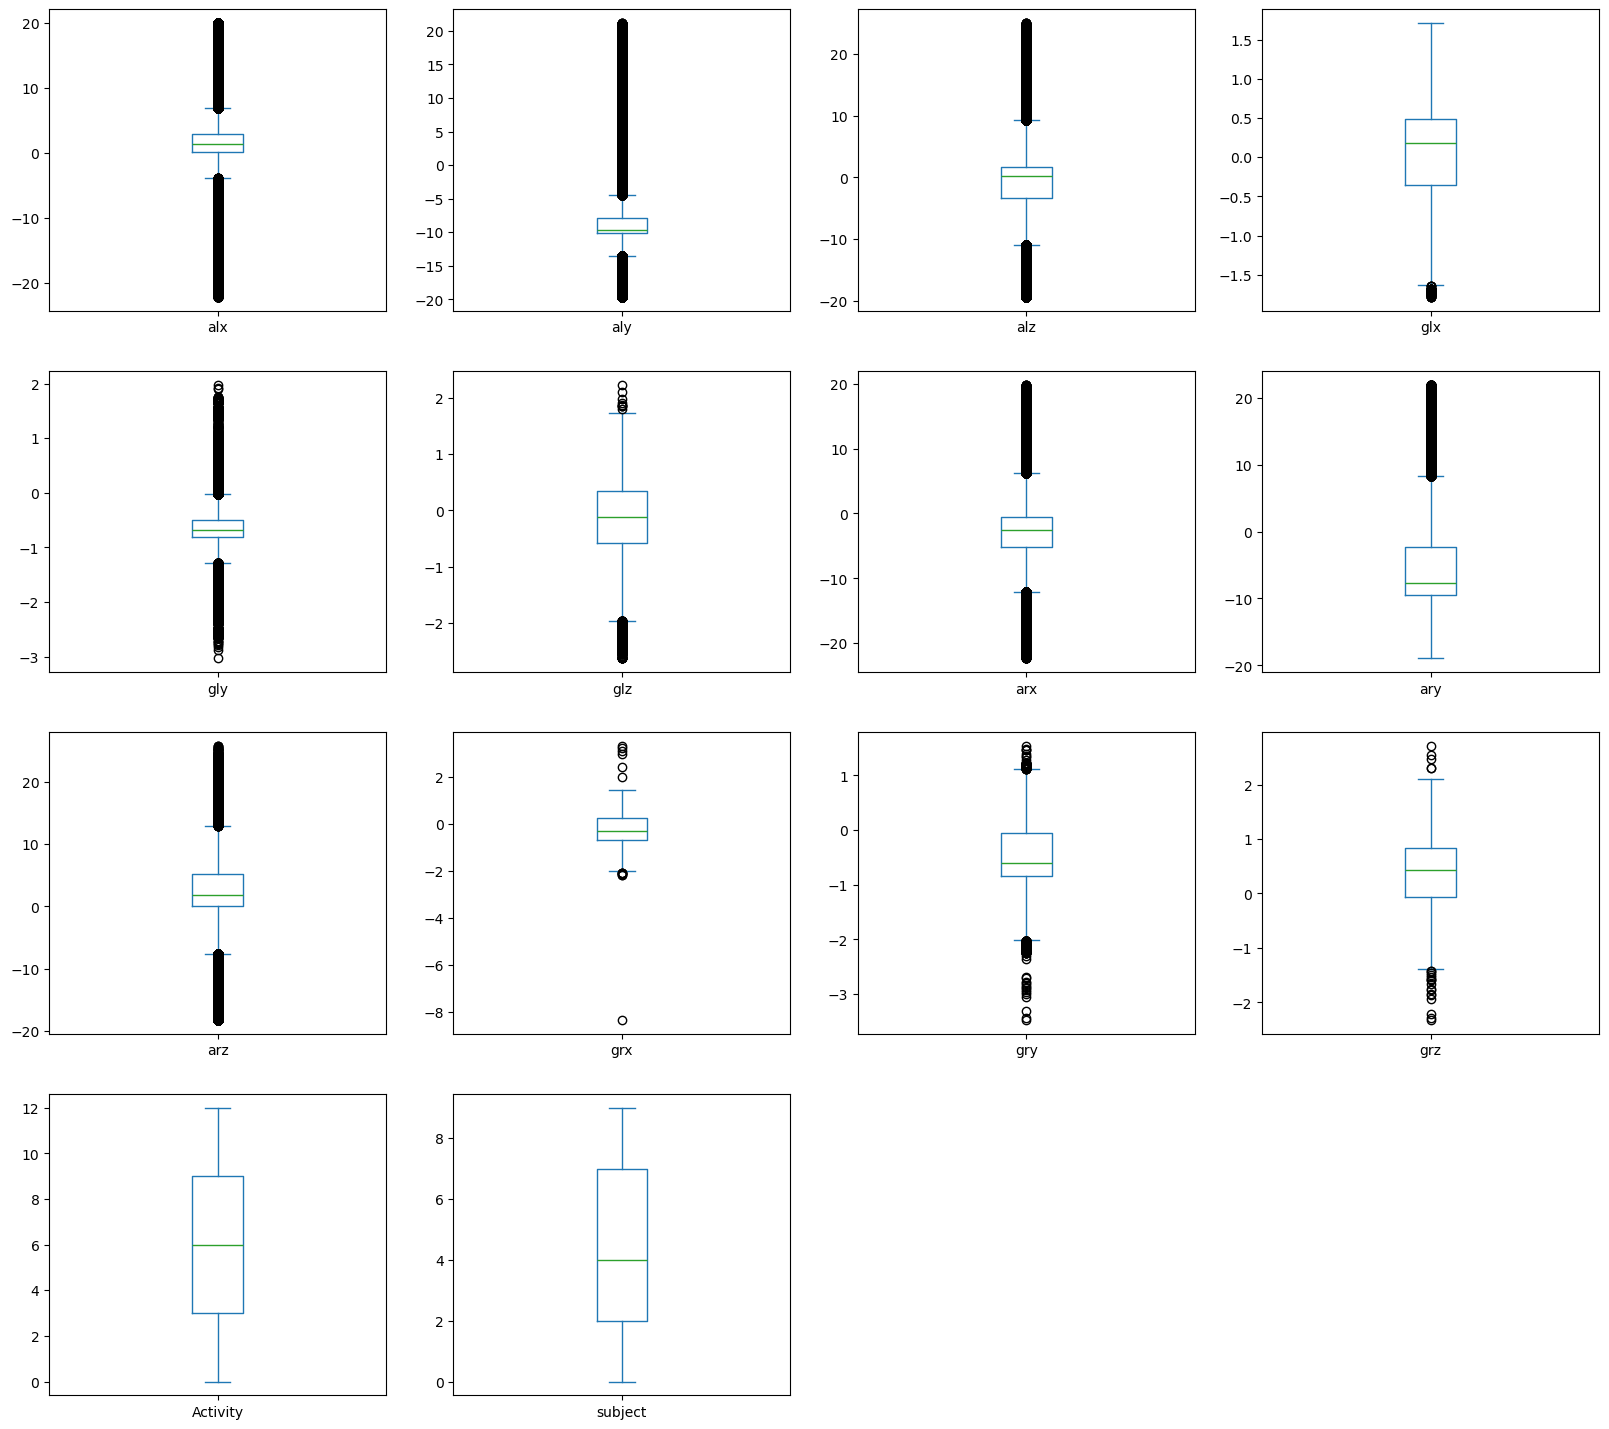

In [61]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(20,18))
plt.show()

In [62]:
X = df.drop(['Activity', 'subject'], axis=1).values
y = df['Activity'].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [64]:
ro_scaler = RobustScaler().fit(X_train)
X_train_scaled = ro_scaler.transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

## 5. Building Model

In [116]:
def resultsSummarizer(y_true, y_pred, cm_en = True):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = sensitivity = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    if cm_en:
        
        plt.figure(figsize=(16,16))
    
        sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=activity_label.values(),
               yticklabels=activity_label.values())
        plt.title("Confusion matrix")
        plt.show()

    print(f'Accuracy score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F1 Score: ' + '{:.4%}'.format(f1))

### 1. Logistic Regression

In [92]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\gsaia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
lr.score(X_train, y_train)

0.5434313629973974

In [94]:
lr.score(X_test, y_test)

0.5440662219856157

In [95]:
lr2 = LogisticRegression()
lr2.fit(X_train_scaled, y_train)

C:\Users\gsaia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
lr2.score(X_train_scaled, y_train)

0.5518448412643182

In [97]:
lr2.score(X_test_scaled, y_test)

0.5529389659599787

In [98]:
y_pred_lr = lr2.predict(X_test_scaled)

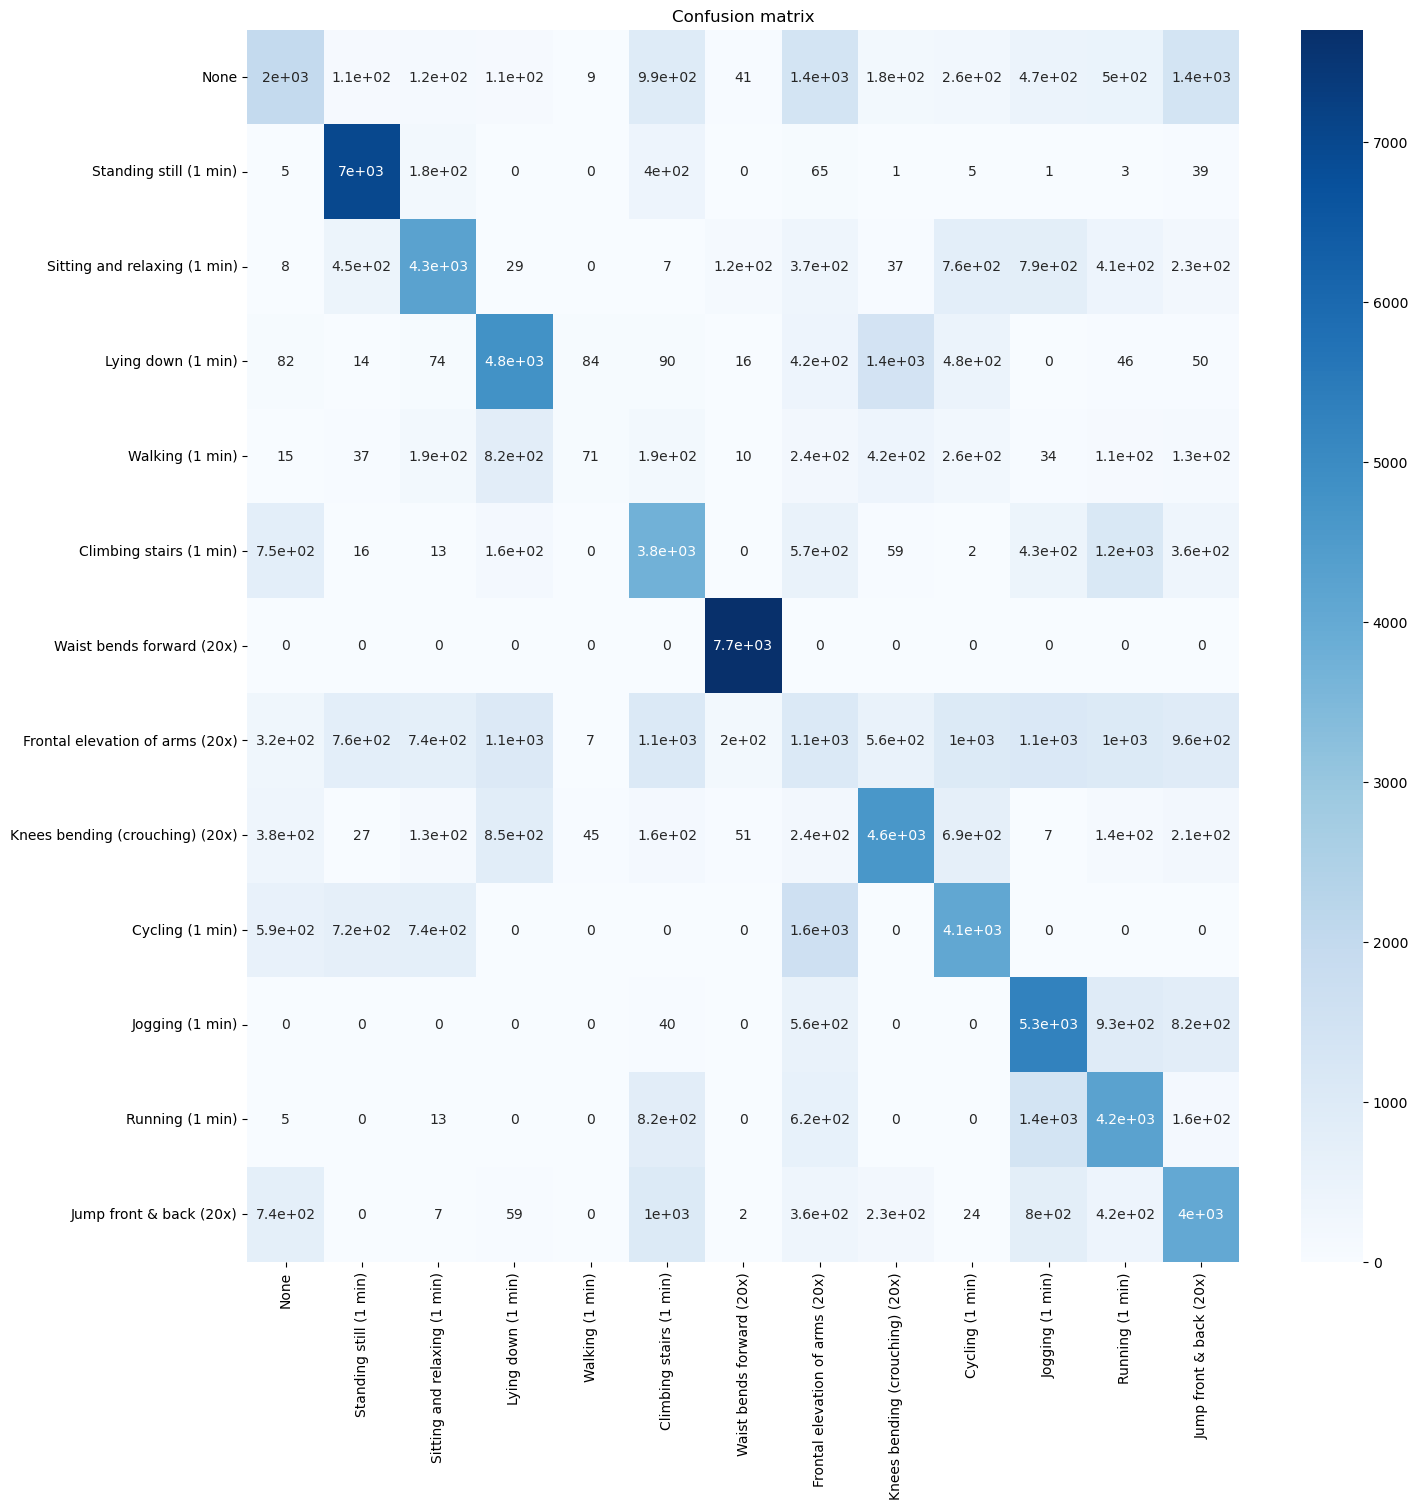

Accuracy score: 55.2939%
Precision Score: 53.1437%
Recall Score: 53.5912%
F1 Score: 51.9886%


In [106]:
resultsSummarizer(y_test, y_pred_lr)

In [100]:
len(X_test_scaled)

95799

### 2. KNN

In [101]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [102]:
y_pred_knn = knn1.predict(X_test)

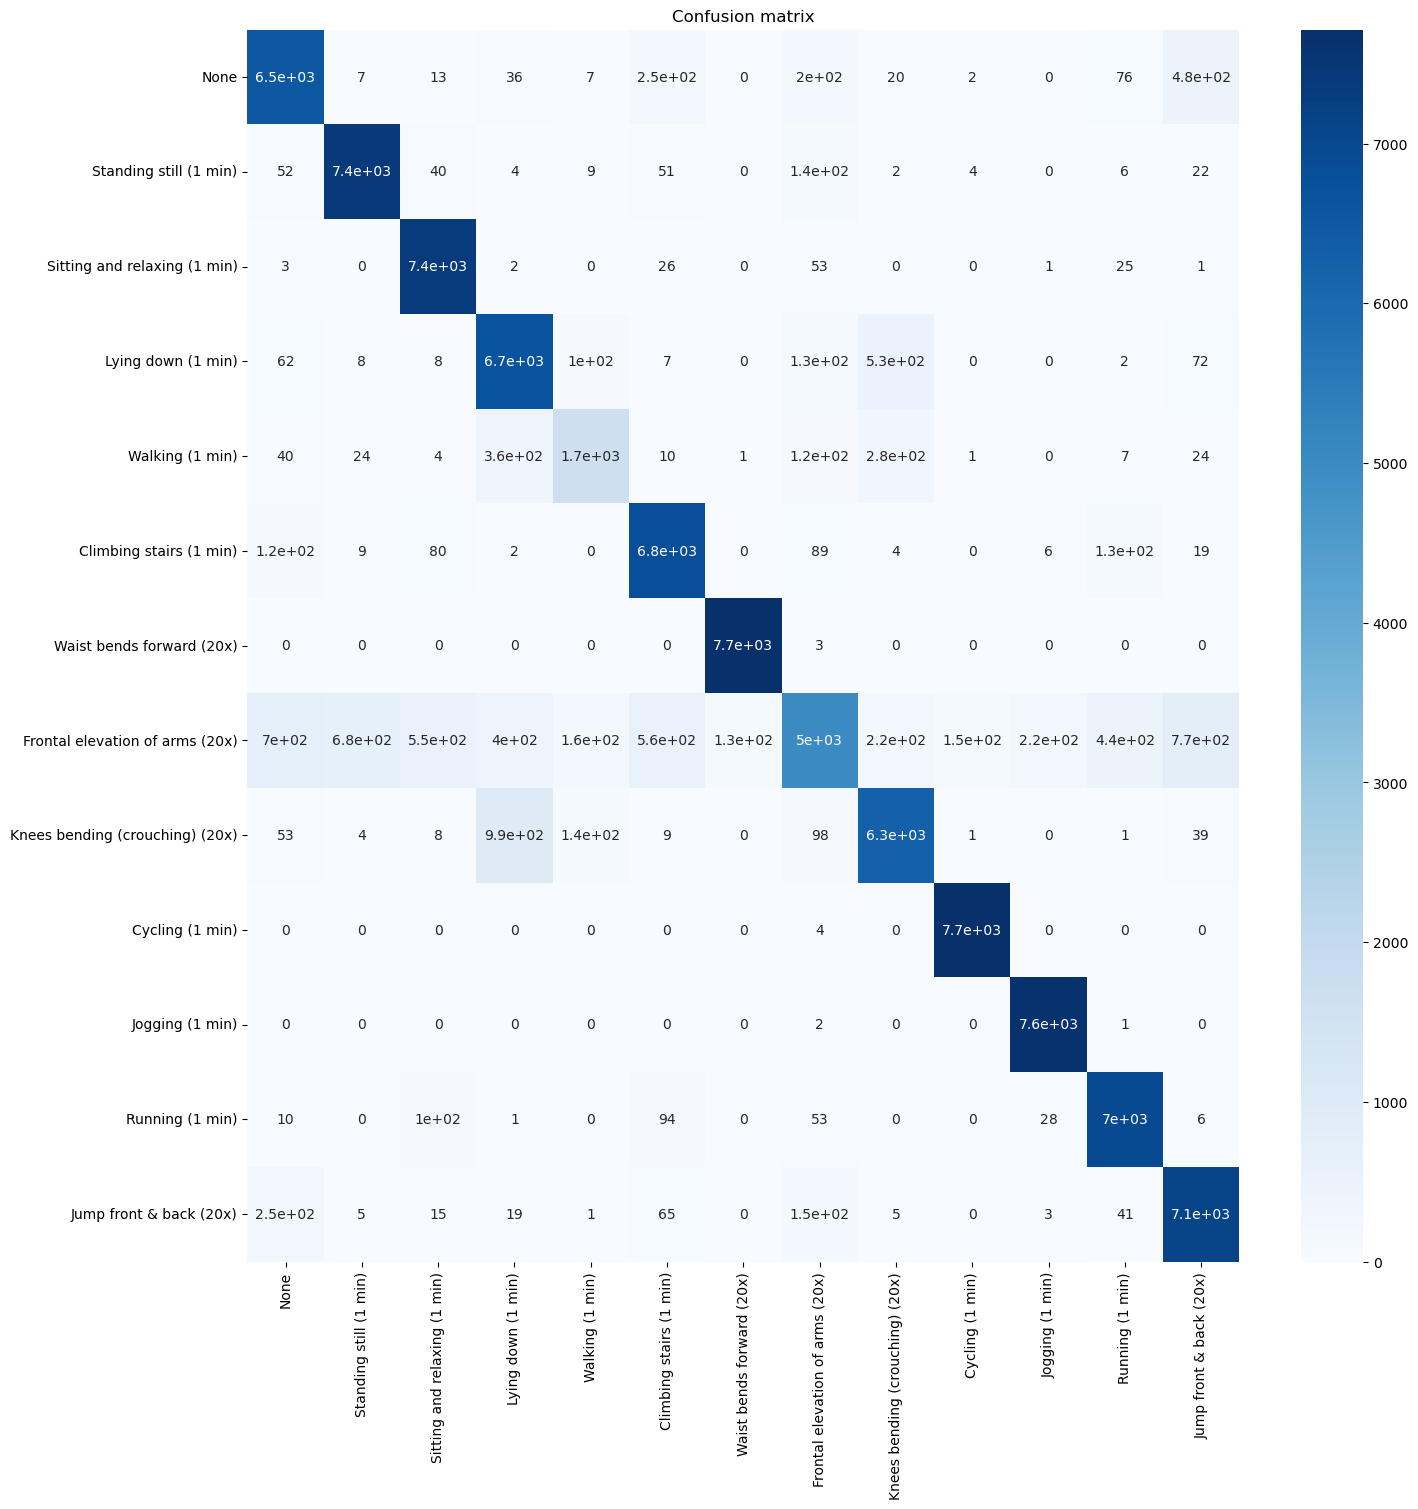

Accuracy score: 88.5688%
Precision Score: 88.0601%
Recall Score: 88.3318%
F1 Score: 87.7491%


In [107]:
resultsSummarizer(y_test, y_pred_)

In [114]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled, y_train)
y_pred_knn2 = knn2.predict(X_test_scaled)

In [117]:
resultsSummarizer(y_test, y_pred_knn2, cm_en=False)

Accuracy score: 93.7828%
Precision Score: 93.6247%
Recall Score: 93.5400%
F1 Score: 93.2058%


In [ ]:
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    print(f"\n===========No of Neighbors : {n}==============\n")
    resultsSummarizer(y_test, y_pred, cm_en=False)


===========No of Neighbors : 1==============

Accuracy score: 93.9300%
Precision Score: 93.6599%
Recall Score: 93.7295%
F1 Score: 93.5756%

===========No of Neighbors : 2==============

Accuracy score: 93.2672%
Precision Score: 93.0093%
Recall Score: 93.1015%
F1 Score: 92.8532%

===========No of Neighbors : 3==============

Accuracy score: 94.1356%
Precision Score: 93.9752%
Recall Score: 93.9681%
F1 Score: 93.6675%

===========No of Neighbors : 4==============

Accuracy score: 93.8079%
Precision Score: 93.6713%
Recall Score: 93.5976%
F1 Score: 93.2819%

===========No of Neighbors : 5==============

Accuracy score: 93.7828%
Precision Score: 93.6247%
Recall Score: 93.5400%
F1 Score: 93.2058%

===========No of Neighbors : 6==============

Accuracy score: 93.5949%
Precision Score: 93.4662%
Recall Score: 93.3205%
F1 Score: 92.9785%


In [ ]:
dt = DecisionTreeClassifier(max_depth=14)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
resultsSummarizer(y_test, y_pred_dt)